Here's the code you also will find in the shiny app. At the bottom of this notebook you will find a very long link which opens a shiny app you can work on

In [8]:
import pandas
from matplotlib import pyplot as plt

In [9]:
def get_data():
    infile = "deaths_years_places.csv"
    df = pandas.read_csv(infile)
    return df

In [10]:
def some_graph():
    # get data
    deaths = pandas.DataFrame( get_data())
    # which to keep? this could come from an input. dropdown? selector? see year slider
    areas_to_keep = ["NHS Lothian","NHS Fife"]
    year_to_keep = 2012
    # filter some data
    # this could be single items (use ==) or lists of allowed items (use .isin())
    local_deaths = deaths[ (deaths['HBName'].isin(areas_to_keep)) &\
                            (deaths['Year'] == year_to_keep ) ].copy()
    local_deaths.drop(columns=['Year'], inplace = True)
    # group and cleanup
    grouped = local_deaths.groupby(by="InjuryType").sum()
    grouped = grouped.sort_values(by="NumberofDeaths", ascending=False)
    # graph time!
    plt.xticks(rotation='vertical')
    plt.ylim(0, 300)
    bar_colors = ['red' if (cause == 'Poisoning') else 'grey'
                  for cause in grouped.index ]

    plt.title(f"Deaths around {', '.join(areas_to_keep)} in year {year_to_keep}")         
    plt.xlabel("Death Causes") 
    plt.ylabel("Deaths Count") 
    return plt.bar(grouped.index, grouped.NumberofDeaths, color = bar_colors)

<BarContainer object of 8 artists>

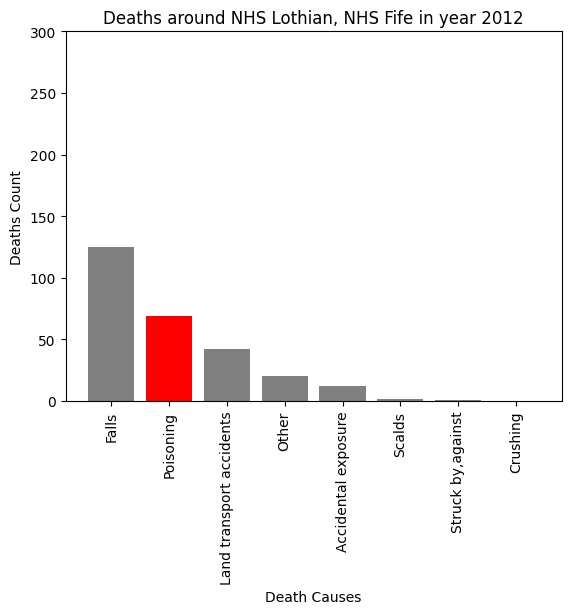

In [11]:
some_graph()

In [12]:
def some_table():
        deaths = pandas.DataFrame( get_data() )
        return pandas.pivot_table(deaths, 
                                  values = ['NumberofDeaths'], 
                                  columns=['Year'],
                                  index=['HBName', 'InjuryType'],
                                 aggfunc=sum).reset_index()

In [13]:
some_table()

/var/folders/vw/9_mzb7nj7lj9nbcxj880frj80000gp/T/ipykernel_26770/2447453447.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  return pandas.pivot_table(deaths,


HBName                InjuryType NumberofDeaths       \
Year                                                             2012 2013   
0     NHS Ayrshire and Arran       Accidental exposure              6    3   
1     NHS Ayrshire and Arran                  Crushing              0    0   
2     NHS Ayrshire and Arran                     Falls             38   48   
3     NHS Ayrshire and Arran  Land transport accidents              8   18   
4     NHS Ayrshire and Arran                     Other              8   14   
..                       ...                       ...            ...  ...   
107        NHS Western Isles  Land transport accidents              2    3   
108        NHS Western Isles                     Other              3    5   
109        NHS Western Isles                 Poisoning              1    2   
110        NHS Western Isles                    Scalds              0    0   
111        NHS Western Isles         Struck by,against              0    0   

                                              
Year 2014 2015 2016 2017 2018 2019 2020 2021  
0       8    6    7    7   11    4    4    5  
1       0    0    0    0    0    0    0    0  
2      57   66   56   85   64   84   83   81  
3       7   12   19   10    9   11    8   15  
4       8   16   13    9   15   13   13    6  
..    ...  ...  ...  ...  ...  ...  ...  ...  
107     5    1    0    0    0    3    1    1  
108     0    2    1   10    1    4    0    1  
109     3    3    0    1    2    0    2    1  
110     0    0    0    0    0    0    0    0  
111     0    0    0    0    0    0    0    0  

[112 rows x 12 columns]

# Link to the shiny app starting code

https://shinylive.io/py/editor/#code=NobwRAdghgtgpmAXGKAHVA6VBPMAaMAYwHsIAXOcpMAMwCdiYACVKMgCwBsBLAIye4xUxOmSYAFNuwA6EWYOGiWUCABMoAZ1n1GTDe24RsAoSLEBBdHiZ1KquHWsBXbtdtRCZbgDc42hswwbKicxGQ8-ApmLNghYUyaLJxksrJoqAD6LkwAvEwuWFAA5nAZNJwuqgAUskx1+dwYhqhOZBkaPPZ0NWAA7gaE7BnYcFB00vhMEwDKcJxwnkwAmqPjkzCGeQBMAAwAjFvWQQAeObtbe3jeUBVwZ-uHehSoOXsAlHi19QXErS1tcTIPQ0jFKRToaBkYA+XzqPz+rQyZCgvHmwNBSJR8wmMIgb1ScjUcBoegcvm6zVa1l+ZH+1g0cA0Gm4pDeiFhTAAxEx2HNUA4mDQnBBPCyIEx+g44BLpaEoKomBxpTRuNjxfUAALuUW+DAAYRuhA59hJJTa6mRVTZHPqAggKvmuQkUiqGTKqtKGTehVs5CYAHopmB7FINMNVmGQh5GRhCBpvBMbfVVCS8qw1JoMO5VBk494qoYHXB8erbXVbGQnHRxSmCbaORqaf8G76ulhQilS0wTXoMeDIVb2V3bdyzd22FAk3UQxwNE70+oNBgACITgBiEPgVSYZoyFqgVpLZfq3P63EGiuITAA1nA4KgAPyKgxzkhOTgKkjwQUBBLiylkBg3YMKgqjEL0EBPgy8yeCIUF3kwIxjHonQOFOCTuGGZDEBkt73k6wATAAcgAEtMTAADJhAYKgTJ8YCkeRa7cDQfhgAAuuhSF0EiOF4agToARgZ6DOGYxWlMw4noKqoUHQvbfvu6Hchw3Cvr8H5MLw0rMhARSOtwFAwHOVROAyuQ5G8TAiEwPAaGQc7ECSNyhL0cAKoZcDGUwpnmU0umHuhoSEDce6jLOTozuwGjAD5UUxQA5CRABCRGwHACXsf5hhVGMoxYXxd6oG8VkAGTSBVUnHtVNVllU8XAAlKxjJlFmIasvG4UVTBWVlJA4FaQXECFnBhaGGCqCBVQkBUMAQBoOSNc1dCZdYzScNGToACp0E4xbKTuDBOAJKifvMKjHeh4K-PyCp5MFoXxRg13Hbw2BVG9OQTAAkhAABWVbYFtsRsd6GhODAg1VYdN3uU6L23RgIKiBk1y3BoH3YF9DEQ9pDA0Mu4XRXRCQaIQdiGEUORrjcDJHtVo4Qqg7CKoIcAAIToSEgHHF4hDXhjDDIl4pA5Al5J8zcCX08e3MYNgPCQzs1gAMw7DsMtlrwYy5sQoR0HOeSNbYqgJQIJLTVAZnSjkeQJeIxBqaQlPS0wczmQl4JwNgCXobVZY0DZIXW3aMPHe5TREscTCcYSNVy144RwFUNATIToYYb8ahMCACXWAlGB-Y7EC5ZhnX8W8AC+ofcTn3Hl0Vlc4rVXPJBgxwbdpnA9OnHBMAa1taNCknx23CsonMPdE3OepZykw-oRWVbinL2vdAjEeGPYxzWBvqgYERuMOE5vfRdYM02Xka+6-rGglgSHLclAWmGTYp26HAxywCE0pOQkipYj8F2RsCJOy2i1HYBwGBkSoiAbaHsIJ4CYlgYOdC8V5ynUzKuZEG50rbl3PuCSmtbRL2rMoDMS5UA+DCMgtE8VrB+39kw20aM9qGyYI1Q+MA8Yn2nqtEezDBE1RmhDeai0mqrFWowoR-st6f3ESlNK8A85MASr9AGdAgYgykdDGR-tihFCFCKHI4MYDelsAyNocjjhQwJOkJ0lhUC5XQFkVwpI6DkhLGASueBwDQHgNQeKYkDYZCjOTJceZ8BEFIBQKgyA8CKPSngPU5glFwDwMtPA6jAbA35HgLhPCCbT1kJcRiTBzDYANgYWwf4FTmDoBCCAeAACimgLCVP0NwWweBdgHDwBRU6ipGkaEUGIDwhBuD2HIBoHpshDhlIqVUrp0pBn1MaS0tp5SOnVPSb0w4DsnYQEpngPYABOWQKt8lkS2UsmpqyGkqA2fZG5nTul7LwDTTgnAZkHFkAAFiueRRZryVnZzWY81pzzgU7J6Q8ei0wyC7X5lpbAeBihQEMPZOiOxZAAFZAUvJ2bU8pDymmQvabc3ZcK9S7U6XpPAOKIAADYCXQuWcS8FZLNlsreXC6YI1VAzMZQAdlZds9l9z1nksJcs2FfTzCEAmVM5EnA3bHGEODN5sgAAcYrKUctJU8ilIK5WHAAPJKkcHsEpysFniruWCw10qeVUr2JcgZ2dEUqBGdEcZkzKAOTwMKkppTrkuoNVK7l9rXWXIOSCI59K9i4pKfMsN0aI0QqjZSuVlzPnfJOcmiAbq9UgozVyqF0ac3wsRU4ZFb00VFAxfNeeDKSkArtfqyVmaK3Zt6ZcmlZkDD0sZUmktRKu3luNTCvteB+U3EFa2otLKO2lonUamVvLi0KqVQGm4aqNVVnSdaotoqV3jsdZGntJqZ0Wt5I4JlJTTljolRe7tU7ZW9IBR6hUXr5qjISIq-10y8AqzmbatNnbX2To3a6gFcbnaJvORAC4z6HV1KdVm69+wAV5p+X8uZqagXprXc6ytn7q1IuvCihtTasX4EZVsS5Z6X3ocve+zdAKB10qKIurY7aIOrqg+ul1cqAVzo-EKuZ+LmNoZJWxmDom8DbqAyq-dxBNXpNA8h5dAnz2sbfQp8jt6HCzOQ7qmToL9PQZE70-F36hnev-X65VMytNbCfRZstwmyP7HxfBhNPG9gPogGrVDlm5MGZs75j5LkZmMYuaGojkGrPed7dFmYNa62ovRZiltjKVaEZg150jaXR1caHTx-LTHdMsYi9Znzo7xMLvy-xpLgmUslaw6O5Tyq92fwPd0-L0mauyc5alrr+LjOOELSrU9I3wtjc69O-YLL7O-p9UoZzAaZnBpC+Z+bxXMPLaC3gfzxyVbHpVh5g7JGjsfpWzFr5cXGV-PA21vTdXxvHZZRlyj1GcvNuxf8xLRXbtXu+8k2lFXF1-MK+GsH7HXUsqa5JiAfzqvvdq4tu7m6WU9d3aq-r6nD2mb+a10HQmlv3ZO1NoN-ydOY9Gxh8H1PRVreGU5wDLm8CFr+XNxnC3meI7laKs79Ktjav+ftgXh2WebtFbh2F-zrsy4R4Z-Yorfu1qo-WgHdHF24rexTjrOPXWivK8cxluKQfw8p6bkXs6BWo9xXD4jdu5dm6U1zgnamNMnLxRj43n2qfy7wLTrTuLhuq-d8L3pur2eOd9d74Dx7cUM6D9jj3crdVi54+5vF-OM9C-V3sXViu+N4ul0X+TUXS8Ue1-9xtuWgcQFxSr6vkWGu6ot8O2QTKje25N1nuPjv52o6ZTbt3Q-Y-7F1fj8gfX1XE+6btplrvkvB-tyP2nwWmXk8H5v4f+wn0J7-UnndwHJfMqjx3+rpWn257wK9vv6eD+Z5n2cx7+atir8L2-4vteT6WuWWNGze9GfeVe-+NeDWT6PelWfe7eUBne9+o+Emi6wqA+U+h+H+T68+qmROfux6wqk+G+7+JeT6tOhawqgeSBd+WGuw-Sgy62nOF+ga+GEAwq++WBZBUWDBj+KsV+wqN+tBX292DBiuassgwqr+3BABPmDBwBOu2WTegO4BHBf+sh0BaWDBcB6BkBmhyB9BysKO6BiBBhdBy2DBeBi+A26SjK2qmBpBch2hyslBOq6+7W2B6uKGp+G2YyyegaV+2qNB5hohvKKG-BQRXBThWh9Blw5e7B2qwhoRIeVKKGihjetGeWOqMhMRhhlhlwuh9hGheRFhYhlwJh9h+hpRYRaRlw1hhOS+hBOqZhNRqRsKKGtOx6pyJBnhY2REZgLMtehwvhLBKmcWsgpyHhH2-RgxJe+yjs8axyFwkxIRNRAxogQxDWhwiuSGpy0RfRhqGxfcwx9eIBeu2REApyyR6xcxpxRRkxuRhx6yxxWxpWhwlRkxJRzxjyrx8xXurBNhy+6S7Bpy1RPxTSfxpxtOWwNqjhEJ+SdxDW7qTBHO5+4xeAwWew+wYWXmUJyJp2ixCGgWx62J0xWORxSJpWuasWJyWJOwaxCJ+J1JZxShoBqhi62JBxMxlJmxJe-aUOluNqNxTJVJXWlynxRaOwTxPJLxYpx2lyDRvuJOsJUp3xspvx8p1OlybhUprRopfJteX6qJiem2ARExRa2JuJa6zJXWcGRJAWBaIavRGpkJWpHGX+Pyu2ewfSnmNp7psGrJmRYBnJxafpQmtpx2nGgpvelp3JFJcphpDWYmTuoZIprpiJSZpWAKSpBBKpIaMpCZmpWZdpYelqPOIa4JGZkZ1OdmJpZ+ZprBMyhaPp+p1ZAZcqfmDpxyQWKa8J7ZJZx2+K5eI6KG4ZKWNZm6+KGRuuKh+uo55JTOiZJxDW+KDxRajG1pEZHZtmqBzWKa8ZS5xZK5pW+KuZTRJO7BBw6ZRZbpg5tZZZd6eAV+Bw6pt5mZJ5XWq29ZfhAGTZmJKaVZ75k5SOhJhy52LZ7mW5E5O5D2iuew3poW45n2IFcqP2YACKf2s5WRLebqLpwFsFJ265bqi5guy5bxX5e5qObqjJA5n5EO55thT+JSKsh5ZFx5FFEO4eLFhZR5d59FrOjBnqaJjZGJqpbqb5fFH5nFglj+uwLFQFUlqFvSCutJrFLFbZBF95oeM5yhOFahewr20FKFhF5uMZ8BRafy+FSlplVFnJsOxlsx2lnujFwJ-ulltFWlAloe3FllN5Nlzl2eQlP6Il-h-5V5fyvF7F-FMlm6Oe3Z9Kz+llkl0V0lJeZetJvZllilqVyls+QZ2FIZI6fymlAV3lrq3e5lnJhujlvJ5VQVkpSa1luVhFc+ARQJfu4lLutV5F6Vj5JmWJuKbFeJhFJ+P5Yx3OXV-lLVgVvSD+CVPGZOJSaePVHF5BnpIGLZuKKVI1s1x+BVelRVy1OVu19Vc1kOg6QpRabeq1MV61jV-et1aVgBAJKmHV+ZS6zVp1sVrqFB5ZWmQWnlZVP1HRysox6Jk1JSe+T1eVfBC1T+ANTK01313hys5eWJTKUVKNvBysul7J85UNO1-pe1OhVVI6TKJ1xNZ1OwDBD1pVM11NVh7VjRTFANGBMNsFDBvlCFpF2N8hlw4NolkNJ6QNDNIN5wlwj+sOJSnBHNJN8RtJWwWJQhctjNlweNFxuF0hqt4tNNhRZNMtRN258tdlI6wqlNxtatr1vWLNbl4lwq9NfN2hlw3N2qX1a60wNIutfSgtYVGJV52qvNHtXt-xj+PpJSwRT1ntrQ3tOxmV3p2qw1wdMd-xGtc5LapJSRUdId9xBtRa2qWNyd1NfSjV2qRtKW0dxdhwrlfuI62qFtFdOd2x-V02j6-Z75ld3tKJwlppft3OLZPR2dKdtesa8NvyRaUxQ9xdNJT2Jy3ppyotXmnd-JB1+NlxZySdQmy9I9F13GnJ1xU9Xdptj6hdW9TdLJNdJOI6py5dn229BJ3NpyjtRd3txpPdDZfd22pmuw7dUl992ZYFSxiaqpvSh9JeOGitwW5wYDRpq9mtahuwi9L94Du90ODGOwm9jdw9yZx9yGOwyNyDsDl93Sbm0pMDODXRYGDdd959E2wVDmH9f5-tYGz9Z92Dp5gDxJdJcyVpyFY2-9dD5ebmPp5DHDad+l7lFwQdbDxda5edFwSDMj3t+KkpFwmDND7DdDxDuyPDBDSjJek2-1PDt9-DtDEOvtTD3OUDdefDhqAjEOclwjrDWDxdLK8FSGWwDBtj6y9j1O6FmFDehVHJDGY5N2+jteLK65nj0jLj3tyOqZITijsTJeeOzNyp3Sx6nj6jpjmjXFRjyGStojXWbO41ENX9bmP+RTx2ouY97Bnj1DOTxdqls9F2BGzjGjTTcD6dLejGv9qVvjoeUTF2VTglqjBWIzoe2jFZyGKsSTHT3toqvljGejyTte8epTQtX9dTKsp9qzXenDjp8lMzJjdjZj1OGVs9FeMzDTpzuT5zXTEjDGV2EzFVqDV1fGfTS9ZzcVuDfG7t4T+zUzIDDl3jjyAzrzSzZOLzcqY179v5W2KecyfyKz8z61clu2fGuzqLL15ewLJzPj3zv1DzR1yGfyNzBLdzm6sB8jJV0L51qjNVoLTS4LML1tPueZGTUm-zezKBupWwuKczjTutDBFjCLgaIDQ1dLNNys-BDGkeUr4hitGLK1TLs6hLoNxLwTUm+LYL6r5wysUTuK5LurlLaRxhCTUm7TQrqNbLC+ttzR2mnzhD8hrh5ZhaStMT2L-N9DzBZTwG7rTKgrtzVtYdV+St2TwbwrCtLTmTSNCr6tGFmWbJ8DvGmN8bbzsZStOrzLeretvzFN6bQLcyTKVrkb3hLt5ZIDxBBKyUIgXQMy-KYQXg+gTAtbdA9bpqProVljX9UDwqhWbbHbjbZAzbLMg7Dgz2fS-Bcy1BNbdbE7juTbakY787BsnbEhmTstZS47a7w7o7rbq7k7hw4jJLP+N+O7DbJAI7y7B77bC77yUT2t27h7i717LbF7nbqjwqheH7e7N7H77yRbyG5tc7d7u7V7+7AHcKMJcyDhoHQ7EH-7L7M6or5p0zEuIOv7iH77yH+wo94F9Kbmgd8HC7f7OHYHk7M93+mTkdz7FHr7kHuHxaJ7WrZm5OWHS75HHbM6UTWddHCHnHK79HM6qjBdJH4Hgnt73HeHtr+BF5nLZmP7L7ZHQn0nxaO+sH7eHHb7qn972GXbvdPbwGUDpyRu2njHwn+nYdDGg9-HpH2Huna75GI5cyk9dnEnOnUnenhlmrBNyGC94nl7knUHPnUT+xgXDHSHlnPnqjB97nQXnnIXOZaTHLOj-n6e5nUXanAKfLYJEXKnXnTn0WqH-5YbT9+XDnhXk7XZBHPGV+asZnynlXIXw5mV9XOJ8XkXXH3n05ibWFh1HJl2NNFXwXTHcjl1sZasgemX3XRXjWFrIWGDI3iXY3sn71g2Fy+Dy3FnanhjT5M2OwSn9HBXIX35cLE1X94di3VeM3jnk7LK1nm3WnTXo30XbjitqpF2jXx3zXTH-jSbwZrHF2mHL3K3b3GbFlF2A7oPO33n8TY+i6F203MPWXcPa39rJOwWF27HKPs393LdIGCWGXuPd3DuJXGJWPCF23qPc3NTtXJyn3Nj1yt3VXDuEhWmF2z3P3r3anmufXgTA3+ul2XjzPJPrPKlEPiPoT5ELPIXoqkpBW0P3PYPvP6P6T6SM2m5nXJ3THizlbFy-L1PePQV5PVjBvxPyvsPc38V9PZyBvR3AnKv3nFz3+SGBWN3YvIXuqLHfnBWXPjvVvk7lVE3kPSFovlvNPQfuDszIPEfxvI+UzVWSvAfkfQVtO7BszOPcfpP51pvX9M2Ks57nvTH81tvWPOzRvOf+15eu2szDv9nPP3nQB-P5x3TahszHv2f4v+165sz-vDfTvc3T6CvRl2vv30XuBKX8nR6FyVllf3fn+uprFyPXfUHIrGzn9wGHPULY-jfRXcNZfs-Rfq-uHirlzbvkV8-a-uNLfybbfiPfOV-p-BredrFnfKf8f0r0ftLu-g-z2TNgJDHt0gz6Mtw+H-KvlzTdYXJuqv-QPh0QFob8jOgaLHgKyf6WcIitTaAVn3AHd8UMEhGbPK1gGp8JavnS4oXwt44C1++tEPoj22poDpOKGBXka3oF6cUMQHQvv3w85wCSBGnELBPgJTLgIY9AbgIyGJQABxFyOBCgCopBBMAYQaIMGQSCvkUg1FO8jz4p58sa+AQUILoAiC5wigyQb0GkF4BZB8g-QdnCUGuRjB7yadnwMDymDdBCgiwYYOMEOC9B4glwaoLhTs8Lk0NMpG4KcEKhLBKgkwToPcEGDlBRgrwX0h95kC42-gsIYEKYDBCohoQuQY4PMFBDPBnbXvmmwSHpDwhzgyIa4MSGZDkh2Q95AryZSF4AhZQlISUIKFJD6h0Q6ulPyYqXYC2+QswR4OKEyDShPQqwS0IJ75Z2aXQjIQMJCG1CJhqQlDogLFY-IRhIOKYREMGFpDuhKwkITOjDqfd+22gxoXUOyHLCihqwmdOXjd6zsxhhQrIb0LWHjCNhMwmTrEJbyzZycRw64asLeHlCbhPHV-irUuFNDDh-Q+4dYJk4K8n21yT4c0NuFXCvhJwmTonwuTfs9h6w44ZMKBGoiHh6ncspdgdrIi7hGIhoSiPeGbD9O6gwIhcjg7-CDhNwyERUKs5j0OebtPETCKhG0jvh+nIRhSMKxsiPh6I4kZiIBRPD2+tHCEXyNhFoj9h0wkEaF1f6J1mRAImkWKKhHkYFefHUUZKOBF9CNRBI6Icl0AHq93KAhdPDyIlFEjxRAognhn3rryjqRvI7UfyOlF1lzufrQNFdwELt4TRqQz0Y6IOY9lLspnG0VKK1FmjlR0WDdhcls7qiQxgI+0eaJ9FCjEebnKMfiIdHBiUxcY6IeNz3r5YAuVIoMdCIVFwj5uCPHMa8KVExjox7I7rG0LcoZ84uyYlkRWPTGhjR0vAq7DUPLGKjYxLYs7iFUM7zDnyEYqvN6LTGNiqxD3Melj3K55jNRBY20SSJOxnD-k6sQMbOJHFoVSBLeV7EsM7F2jKxRYyJnnVezcjdxpo5sXSJOySlXs9g08V6NvHSjUm+o1Lu5VexljuxTYscQeIJ7BZXsxo+8aOMLELiSmzozZinmPSvYOx74rsfuKAm+jxc7BV7MOP-Fzj8xEvCQrtlewejkJ64iXgmPAm8MGxgEu8VBKLFmUaBL2ERjOJ1EoTZxEvK8b6UInzjiJMEzEaKimZaYrKN4kiWeM-GwT0+wOG-OuJwn5UyRPyfCX+O4nMTzxVYm3kAzzw-iqeVE1MTROokj4JCCEpnuRCEnISR8CYiiVhMkmEjpJRY4PtmP+Qi8tJ2EnSflSvHS8mA2kwydELapPjp+zFNHJ41XHUThJdefie5LfEsSjJvEzEbCz7GMMBxV+WHIJKsmOTWW-BcCYUyUkZiVJyk86pyPcmQSApAEpidKOb4BNW+jzcyUhJineTqW5E8yQZMynJSkp9LBbujiNwOTKp51IDujh3HFTrJi-csghNmaeTlJwk9fiBM37it-krFHqUlL6kyt4aStYaVFLakxT9WG1HZsNIkmVTxpm4tQujgynGSeJREkEaTTKlo4BCo01kdZNpq1TnmiU46XNK-5TMMJo-RifmNWm8CycJ42aY1LzaiSTkL2dHEdI-E7SvBGA+nldn+Q797pa4k6dG1d7AyZpK08GWtJhyX8Lpv07Kf9OoFmS0cj-RGdBK2kPDGBtUslj9KxlBTdp9RGsX7gQk-9QZXk2Gb5ORYg41wcxAAGouRvYySDaPzCCAQBoA80Y7CMTmFocXsMA65PTL5JMyvkLMvUGzOvAcyuZXWBYvT1VLItA8wsvuKLPmCooJZHgKWSoBlk8yNqGEyVmUmVksxVZ4syWdLO9S6y9J-yQgULMZnMz1ZZs7WRbOpyHB1yyLdPEbKYAmyHZms82dzJdm4NkWheT2d7NZm+ynZ-szdK0JcntDrZVeEOfbLDnsyI5ssgnuBMeqGy7ZYsn2cnM5nOzN03dUKfCzQ7py6ZWctWUnK1l5zI5MaOCTxh-FaDM5IsxORrNzk6ztSG1JDJFSVnlzTZ4c6ueKThkvY-Bts5udnMrl+zB5bs+IaPJVktzHZA8hUoHLyGzzjZ88-ue3ILlq9nx6c4Ob3JzlVzN5tc3ypFXbwJzx5rcw+fnMDIfSXsow1eV7PXltzr5imR-D+OrZNy55F8heUfMUwSF-kuwz+WvO-kbyX55GK2WjguEPzQ5l8yeVGUl53zyc58iubApTnwKrxfw6BU-Kvk1zFMCIyBR7P3kTy0F1OHLuWTvnxyiFqCxeQ+Q+kKzcRQCx+SAufm4Ldyb8qXEbmQV9yWFgjWkj+KZGMKYFP8sBellv6A8-OZLQrFwoPlwKHybskUUxCoXCLWF0WK8XKMEXYLZFU5bea5I4lqjFFY8lBcoroYwc0cZdAlNIuIU0LccBnMKfzKlyULDF3CnBZRTDoITtUZ8pRaApUWLi+FyuThV4p4UQ4IFJVMuU4pkUkKbFbspMQYq-lGLvFlFK8bmKwXMKXFDFUmSTnAnhcNFqSrRaBUoZo5TkhC8JVYt-kS86FyuPeSUuoVlKNcdcgCoUscVxLnFeStnplQ4nTiUl8SoJYJQgWG4Al1S4xdUwQV4oOuXSlpZEs9ySlDcUiwJWksEr4LDcPcwZQkuGUFLDcN+SxTUpEV14KlreMhjku6XzKfmYdVPIdwsVzLWlakvxfsqaXAKjlVy-Kn0p2CeKVlPSn5uuWtwDLmlES6xa82mWUTxlvy2pXXkWUMTYl9yiZX8rT769W8PnQ5VCpBUhSGGxc-8oWmtybLLlky2KWPXRUnYEVwKnZU+ngqqlrcVSn5aUqJVDy8UmkpgFsqGXU5SpaM63K8opXbKfFw-Bbi7m+WQrCVHKnRUxXYIu4wlbKhlVSzTl4oteQKylSov6lFyLuwGIVXxguVvLjlZrepVfhdyYrVVjys-vmkMqSriloq1ZWIRv55S7+BU1vJUwJUyqjCIyq1XcqYUPLsV806ZVBRtXsq7VUzIVWHwhVOrEVIiyAU+VTzjMPVYquorYtRUYkrc3UsNSavCKS0x6u2AVkgqxXQqSBiudFYXxVXGr3lEavpRXzjV5r4B9qgVuSt5W2qCiuDAVo6qEXxqI1UzENayorWeqq1pioaiKorWfJrwXSa8J2w+nYk8UILaVd2t7WdtH8mq76TatHV0A+17ycvKnhBl+rQ5M6udXCj6XIsc1Xam4D2tnU5C86Q1I1dus4C7q11JdLlRjJHU7qx1gHDJQpyGq1rE5q6ztrwMjw8r-VqKZ9bMIGlICZkQq63Fuo-WPZT1VaR-MmsFnLqn116vdacPaV4pUB066DWesuR9KDZV6k9Tepk6fKbZkG8eV+tBFcqVW6GkDTOm9Xwby1QG-DViKfIR4bqiGjDTBtJF8zwqeKDOcRsw0+dH8SGNPJ2so1Ia-5bXVjbMpKVUbBRYioJn5zTzLKKVom0tSPNw0VzZN0ymeQppZmyb2JrGo9XxoY1nqyFwa1jY+rw38bdyH09FSW0A0rrjN0WMOtxvvmqbP1Vm0dPBXRUfz2NjG0dH0sAVuaz1WYtBgXmk3HqSNqirlVu282dkBVblK3Jgvs3AaONe3EzBHiRH0agtJ2D6cmpA7JaONE4+WS5ubXaaUt73c-pXnfWWadNG4vpQIrC29JDx+0o1sJpk2Ob4eaBVPAorpVEKqNj4t6kAM0yV5U1ImxrQT01VidMt7m4CfKpdF-rK8FG0rSlrp5ySlcrea0SNrPXNNv8Q2vLTNo4189zV4iy4m3hK1QaytEvT5ZGJi1Ub5eXKmJW1v61Ha6lUzdFckrO2Oa9eT5UlfWKe23bdlzGjEhHiKUWbDtKW2SVw0Wmt4b6-2ozZ9pd5xZgsbeQzYpsc3e9xNgvPbZ0o+2A77V-eA7RDvR2Sl+8vGzbe5ucldaDRjKfvPVsC0cbdUvA-vH1oa2fbkVvrUCUNOZRbdltOK+nktRZ1aaCdZ64lWpSvz95ptAOjjblIB4SaM6feHYHDrU2OamVfmlnRtuF3ubOVJYvvARLR0i6ItDrCfPjqV287vxaugLflsw1yqUVCq5nRPlp0U7GNB-ebQITV3aq6dQWvVa5i0wT5udeujVhAonxC7sdJul-vtInzS6HNt206aruZSf42d80jTcygsnXand-ugnm7o8lR73p32s3rHqN086S1-BXfMqtT14DFahaNfI7ut1rr0iSOtei3jXwe6-dNu1GfLrXy+74doeiogtzXzB7Yt9erXSTmL3uqqtebancMxtUIoukPAcXHCg+lu7Q10q0fXQHH1544U7C5lLGtn1eB59yxbwZlSQyBsrdQGufQvs7be7s1I+9fYfofZ51A2teiuQfs33nrw9gbZvSzNv0T75Ud6uwn3kOmn6x9d+81FAOZR3SYtL+xfcWgHV945+3+jfa-vw7zb2Ce+cnfvrP136qOeGcA1nsTnAGq03updfHorWYGfhgezdZAfP0EaH9CMtfT-ugM96NuABp-ainwMydfKe+RXePIYM+cPpcB0AUAaQOv77StvVUkjV12sGeDIBiBrPSypI0EDoctg2Jp23i7q9CGig1AdEMY60N3Bygyodx04bcDiBjQ3gvf2Loka1+5-SIcUwFKkanetg06PG1M6dsfeOjUoZIOjouNL+LHTftMO7l4KcB-gcQbv29c5DyO6vY3McN+GMdgbcHe4b0O7lcd8mnQ9IY8PRZG1L+UvboeUPhamD1QiIyYaiMPYp9L+SwwkZOwuHmU5m3w6-sK3f4BDdmuIxgcKP-d+uVetQtUKEORG0j1WjHV5vUNtGHsuOqBV0acOdabaBoqo3vviM5Gac-+6ocYfoOFGxtZuibYT2ZRJaQjr+ubVwzdR94MtKxkA6tp+S74GF2xh3N7spGHHjtl+yrf0bv0XaH9xHMozseoMz9mUrWyxWwZe0JaICKRsY90a+0-qBxx6CmtMdnSFGgdhzUneYruNBV4Ku+JbacaeWV6U2YJlg60acOmTG9AYiEyPlx2naajwh8Y0TqGM7yECUh2o3iaT0IFRjJJ74wzu7YDi4D72nE8ibv2l95tdvZlH9oxPV9Mqu+MHRyc-ze68uvJuXVdRLZInsjVJ3BhgTcNimnDk-GOW5S0wYEWj0ppkwT12wYF0DuJ7o6bsZ2DTJtHBJbhydt3A72CGBT45SZIMu6TkghA5bCYULwn7+Iqc5YaYD1oyMCBRnI2HrQKOnRTMxj08rCSMcF1dDJ5UxPqDUmZVSxBYk5qYtMIDfjaHKgmGVtOJr5ZIqeFUmY2obHAzZp6M5vor0BHGj6BfFemd0JEFFJ6ZyUsQXdNamSZcpzqlIUj3pnfK-bEHGIM3BUJHkAAWREDSjeZcZtFVIRT3XJWz38bgJ2e7NDCwNA5wPMOaECjmmkXZiEEMMVyCF89Q5ts3ObwALmezcMogobzKQzn2z858c-uv2n9t08B5jc1uaGEVnrVa5kc2OcXOdsAz-bKvBeYfPbnfJ1BI3G+aPOPnv1Nh3U25OoItn1z756ITAa4bBZqChWH85uePOwbZ6SGagtOdAu-npRKG+05auoLk5YLV5qtOuWoI35cL8F0g16akKFq7zs5sC1WnwXUFC8xFv84wc6nkX28DF6UW-QAu-rBxHBQA8kNQtwXGLnGyaVIQgOUXDzAl9ixtRWI8WYL-FvC+AswsktOCKF+82hd1H2rOCOFuSyRZi4LdOCRF7S4Jb1HE7CTPF884ZckumLOCr5iy5mMjXm6LSnBVi7ZfC2PcOCXBvi6pYkt2X4KCpgDfuZcu7kIFQhWS15fkvRYCLih8iGxbssVm1Dnlqi2pfC20XtDMV9I-kyEL0XAruR9PV-TVPMCArYVnS9lvm1QWHD0V7K74vEMmm2NFVoq4JfqMC8CzIqHw2JcvPFWNLwRuq4le8sbiKz4Rwqz1fCsnZnzsRtK+0assrzur4l4a3MZ1NcWoLmRwazNZ0trHHSVBToW1eotoT46UhUo1taSu4TFLg3KQtUfGt1KCLrm6a+1cEvXGyL6hUK0NdWsPH3K37FS09duuWjTrBl+q9KPWZ9mKep18y79acn1Kk0p1rKyDchOZURUWx669tbhP5mETp15y1DZHwEWTj8Nw6zZL0sXGErK1wS-ifZauSiCtxg671e3zMWOC6i8m8NepP9i0OUF-RfjZus5SwbpN4Gx9bZvl4qC4J2mzpdF0NHkb1Nmy2jZ7551zaqNrm9EJV33WHa35yq7KZMsk2pC2J86x1Jo2q33rBN3aWDVyuKrVbWlsW0acdJIX6T51y09JYdqc2db-0s1WLsCNqEHakN6WxqwIsCn+bjFz0-uQ4Ko6WbCNgAcrdjkQAHCCt42661e06phuy11myjPssLHgsDhbW7HZz24qo7Rt12xmsyqJFWdnt4mdSpDs2msbFNvNuuQcIu3bbJayUg4VFuZ282QHBwlLcrs8CqbbtEC15fMB4x7AlAfuIZCGEDrj0btR6+Jc7sOBu74oPUH3fHVp2Q7iZ4u6PbvY93J7ZAJc9nZ1Rpn57Xdu8BPanvvIIFbtH6z1YXvj3e7K9k82jLdo22Nzx97e6fevMLc3aFd6+1vaXu724U929e7XZHsv2d7Z995LTiQyB0w7R9n+3farQfTAHdk2Czfdft-2ZOclQtIHWHvP2x7t95e+BYWmqlA6ydx5DA9-sYP97q5ze6g9gcYOy7e58m3g7AcicH7CUyh6A-Qc0WDDu2QOk-dwcMO371GkzOPUDpN2UHi9-B4pgHVYPfV-tppFQ8YfkYEHOqYffQ5IeCPnOalLTMEWQfsP5H1D-TvvdX3EOBHGjmUftOCIZ3v76jyR-p2rsn65Huj0xz5xj3BEr7ajqx5w700mZEHX+yxyfesfWH5jthunCHfOnuO0HnDmrnbpYe8XoHHDuB05sgY6pRLOjjx0E4LuJ1VH4jiJ3ZbLtTqAnpD8LSYUHs4HwnJjhJ7Y6IOZOFH0WUxYnTYcpOCnkT3sd48AuhOv7-D+JzU-qXo4YnfDhx80+iEVG4sQRDy-k8cctP97-lkp3o5q0X2INYjpTKk76sP2orUziR5w8GPE2mKWD+KwM66cbiAHOqIjXE8CeRO5rNJtDokToEx3On+z6IWteORDUdnjT851k52stN7C5VhZzM6OtI2HTORYB8Y8GeXP7VBdduyA+qd-Pq7XV158C4dwN2Broz6x28ccCAOVN4L35yb31tsEci9jqp8i5HxS0EXlT6ZxC+uUtNEim1vZw88RsO3mrORDp5i82fo286Zdb5004ucNUH7V1pF7S-yoN3Oj7L5l5TafKJFQtpL0p5-jyMh3otPLsl5-ilqJ3wRQrvR3zqJc6pljcr6x4LaavC2y6dzml7y-FsGODjKrzh7LZ9v11GX9z4V0rYJOuTEieNjZzq41sDUdUrW212S+1NHP-yg9mmwa7gcm3jkE+R14fZ+ccvLThfR1xi-xdYuv++9vm167tv-OYTMbjVtXY8UEpnXpTwO5a9WctFTX2rl1xHZMwsOrtqbjRz4VRc-IWiODnN2m+TOlXEH2SmF2-cL0tMgi5t-i4s+9cJsPnlqjxWG7bdx2y7PJ+t+29wYeKtX4boNzWaDvymWi1Lsdzq86L5NTOgLwN9vdTkDrGUpnZJ7O8oCpyJ1kxBkim9bc-3U5EhVUqZyMdMvt3ls46351M4BuL3Pi12XnVM49uj3usyUqZzxd4PU5AZ0zqO6-e6zeBPRbN1u58WFy6nXF1kz0SXf3vB5clbouColegepLhaHohW5A+DyIFPRc92a6nlPvR0Zzyt4PJyeTEizQrweWRquJlmyPS82nLth6Izv-3pC+Oz488aTE49qb0ssUamLQecP8CiQnsUHPUemPmHqVUJ49Lrkpi2Hwj+goW5TE73vHpj0BymIvv5HpZQDxLgPcd3X3tC0t1abY8MftP2i05asWA+MftF6k1Yjx+k8PlMPM+sT66l81XUF6aHszw59wYL0pP6Hoci9eCwL15P1n7RbqQXqfvDPoFAdb57cf2eNxYdCLwZ9U8Q5+PkxMJ4e-i9+M4Zp72J4h8ooSfh1UX9o++4yd5eHsMe-Yp59c9bP-9+xFTwI+KbMfAL49fYiF9S+h5pHVxfGQR68+CU0p+xOLzV+GWYf+nKXvr4JQk8jOivVPd95M44-DKSv8z6b4JVpxX5ri-nzrz8wHWgldnWX47CCeWLdFTnJTrrFDqfwoeCrB37bwXeuK9fx7h3+1UUtM+heWX4eopVZ9W+vMbpjxTd+V75cmYlvY1ob9d+Oz027F-5Xz4i-m-irc9jxarwD8ZULTQSS1s77D8w8kutvsPiT-tfG9GvUcN9e7816JYUeb6L3r7-tSC99HUf4RPWwDe5yZmb6ZXh7-NP4J0fxX4P9VUuKuKyvyf6qzD8q859u2n3cN3n66tk-6vBf10gw4OquKY3RfYZxwFpjBKff6faeqn5d26JOv-vK7qtfwTl+evpfEMv9aCWZss+S1mH4bYj4TW3fo3uv9z-G6t8E-k3HX4n-O81tXFsTJEbgEUC4CnQEk7vz32oH7W6esqT9QrG7498bQ-fIf336oGnvyzuij2pgBH7D9R+E-Xv+dbSSSpP1ycyf8Pz78T9H7r3lxJ+jfiz9J+c-Kf6lE+-ZPXJi-3v0P2X-v33Wn6heav9X9vW1mPqT9KvM39L9+--72I+kiuLKRd-a-PfmTnQpHTqwQcQ-yP6BpnvYlo7Vf7vyX+H9R+EL+aSQlKX3eD-F-Nf6fzOjwlwlM-2-lv1hrzpz+i-R-7fzQ-D1z-08U-3P6RoMPj+nTC-5fzv-v9MXg14ldWO3jv91+OL4Hv4xbJ9gI3F-8R-IS1t4XyfYEn8L-V-0UcWmJDGxIEPUAJX9NHfPzohSSGTi39X-Y-30c0ZRAMP9sAy-zMcFuRAPP9CA2AP04AzRANv8YA3f305fJRAM79aA9-1HR1vG1AbNyIZANctJpDALj0uAzwzUoryPNiwDp-HAP8MKXYWzJJg-ZgLr9HPWMjJJA8fgOC1r-GmgIDRAogOrE2-GgzJIyA9QIoDWxbEQBoaaJvxkCwA2p3ms-jBAJpomA8gLoCijJNRtR+9TgNMCUAqqzX8hA0RyUCTsCBWxJZHZwNsCWA8Z2hwMAuz3j8XA2ZxUDtHMIICC6-ZZztYDRIAJGkRA3PxwCWUGEi-8KLfwL0C7Aw5wZt3Xb0gZITAmILACrnRDBtRIvaIOyCWA3Yyfx6SfxyyCUgjQO20JAz5ylJeLLwLIk8AjBmgDig1wLusfbLkmkDegyFwMMjAwr0qDGg-QLhcnSNoN0DJguwP+tOLAcX5YbUcgwaCvfHAJ29COIAMvV1g7P30CjvSPFWCbAqoLr9EdTtxDIv-CmT2Cl-BYPtVsSDyy8DdURqnwYeg04LACibeIOfEgAyZyeC05eknisvAoHyjVJqIQO0MgQsGyMDNvCEMzUMA-bxuC3-OvzVd8pEMjhCTg+YJYChTeQPwYf-cIJqkVA2qwmCNgjQItcVnNygwDWrBEJwC-qYNQKDoXKkKIDXXPIIxJS8G1FiMlAn13FwrAxFw5C0aWkjTw2QmgOGD5pHwOlIig94JQC9pLoJR9eQ3BmxIMfIkP2C6A9NzJC-cekmqNZQroiADuXDkNjMlgkuSECyfXUPqV1KNUjUCMQsv0bd80TnWxJxXY0NFCOfY0OIpDucUItCR-XGQR4MAgX2NCpmdUNxDhQwfWxEhAvG2r96kIoAVhVUQZGShWgV1F7N9Q-8i-8ybBELDCIw4lGjCKAaP1KsbUVrVDC6AcMK+Q0wmMPXY17KUh19cw-MMjDs4dMNjCC7bEmZtyw1MKjCiwi-X2k6woUOn8UwgsKbCMwyoRICpdV0K99OwysIVBqwp81GDsw9EMHC8wxsKrDmw6DnLJIA9Exf8Ow6cK7DZwnsNH9dPAoNd9t-IcMLCNw4tDctsSK7QbC1wkcLnDi0eCgwC4-U8OHDW2C8IwsLg1jmPDzQqcIrD9w2uWdD6TW8I-Cq0F4Mr9kw1cLvDRwh-y0C0uY8IHC-fPcO7Dj5fJmPD-QlcPfCYIoR108WyOfwJQfw5CKkd4ab0kQCMI3cKAjfwuAP1UsSMknwjX-aCPXDAyHwN8DyIxCJnDzwg8OjJWwrkjojc-SiMYjAyRqgeC2It8IYj7wpiJetSSeUN4ioIwiKwj6A2FR9IpdUSKj8OIgSLc9TNENBeVZIpTHEiqI7gPp5cIoM0wiNIgQMuYR0H0jeD2I9SM4jwtGiKQCCIpCL0iIrU-x9JFAqyP4iQI5QPusjI18LEjrIsyN3IqAn0jmC+Is8IUj0rSO0tIqPRULkjTIwKPaM0tZ0knCPIpyIvCSrdY2EiOAsKLUjPIyKLgpt9END4DHIgKOcjvAtAIMoDgYyP8jgIhKPuCDgIYPoi8o8qO4jRPVKPkj8ouILk5M3S0iIcGoiKKaivrNqPbCTI9KPyjcg4H2YY2oyCPCj+oi8NKCeMXCI09kg0qKIi6lXy2yiEIvqPiiDw5oKFt7+YSM8DcosqLWiKovwI6jxovaO4jQg3SK8i7tR-xDQogs6IyiqeWjyui-IuKJqiDwxYIAC0OXCMyDDo1aNeZijeyNGi0o76OhtLmNCIqCbo-KPOCWgy1XsjlouaIki68YikMoQAnaPmi68biMy8wYi8M+CWoyLRDRcvL6OeiIWOCMMp3IsaMBjc+XT1IjinQCKOiiWGL1xjeo2GJsjP8eChfJDKf6MaiLw5EItUSWH0na9lwlaIJjWWBGOuD8Y3aKJZuIx4ORi4Y0kK+CVbS0jG9RYlGJpDwzENHmcMYjcKZCho7nCvIk0EmIBjBYhnwZFVYx6NJiDYr-ncZVYhmKeixYr3UKj3KXyPZjOoucKlD5dXyNijTYm2KF9r-JNBhjrY+aJVDZY4Ox9JCQ9WPVVuaILCqiBYz2KV94wjEjQj6QxWIkiAZebVZj2QqWJsirQn5AQCgsE2P1jo4vM0hieYoLCtiPY-2Ib0rqYOMdiaYquxICgsd2Lziy4l60MiFQ0OJLVFvENDZcqIVSAMwu4miCaQ1BXT3EoeaAlF7iNzaVFHjHkGwXhoAaBCkDwJ46DHnjiw8QxnjBXSiGogx4zZEXi97O2MMjxXRePHj14yePL8WIjn33jN4w+P7i+UWuJ58z455C3j37S6MtIBfW+LEB74vpFpxDIqXxfi147uMvjQDXTx1i8bb+LfiILda0rJCsYBIviq0Lw0rI54qBIPjf4rAx3jKycnEgTEEggz3phI5mzQS+4v8NTIsE9PBwSNzUCMnda6SskLwiEo+K4crUSsnbxKEv+P-8LAtDiHilw8iHoTX5eGlZjsTdhOIiZkbOKu0eE1AKfC-OVsjgTEEhBNwTyMBGLrc2E+BPPj0E4gO9j6TQRJscDDFhMIS5Eu+KgSjMKSLOQq8FRK8cmE-8hni-bAxI1U+yI3DMTFojcjGVZE8RPkTJE0RWET16aBjKQzE4ikQYR4zRNfjtElyIGDdgVBO8Sf4xxM0DSEzJT7Ib8MxIYDdgChKCS348wLdc44vsn0S4k3xPsD6eBAN2A6E1JIUS3An5BfILgSxJySQkxqxRCTrDckBU7E3BIkTiEh7A8SEPFRKa1-Eue2CSN4rRNyTmo9bg14U0De1aSe4tJLSDsRHpI0T7E9pJCTBokEN7Yek2JNGSfE3JMmiGeHpJSTZkvpL-iagq7mKjsklZLfj1o9V1aDKoopO2S0kzoNdjPGEHBUT+g6imiYvEo5PmSXrcSk8YxE6pIcTaku6KGSNyChyqS2kuZJCTXooxLEoU0Ohy+T+k3JK2DAsSClvNgUheLSSjvDZPqYbk55LGTXkiGI2ioYzxi2TEUn5ORT7g3pgRTvk1ZMe9XIxjHOTik7FKA4DgUIJUSqdOCMYxAk25JCTgQhy1MwKUyJNJSqE5k3WMryRjBGTMUglNSksojclmw8UkFIZTawxjGWTeUt+KxCLKClIxT8UqVLlCPmYVOhTckmWOxiyEjcky8VE5WMcAuU8YMETNYyZP9YDyOlMlTfEzkMCw9U1lPpTaky0wl8DgNYIJSako+LtNnE3Cj4wZks1IUSXYiuL4wJU+VPNTzWa-z4w5UkVNtT-TNRJTQPLA1LzcaEjckmcDUvULej3XKNKeSA071Ord1jb0n5ZTU9NMcTM4ueijTrUr1PzSO3QuOfD+WHlLzTbU8uPkD+WT1OrSXUtvU9Co0-1LDSm0oSKjTQ0lVNLSyTDckpCCUjs0mQOwEJLjDk0lkJTQwXReKHTVAEdNeS5ZWA0nS00zs2HS0kuOlnosScNmVTNzVdNyTj2ZBP7Ti0y813TR0nFKmtB0k9PnTFUhHyhSd02dLXSm4ydLbT5zS9KoS-9flxTRqjadNfS-4sD3+TtYz9JJTEEmdLnSqE0BN9dP0iBKgSQMtJJQMTkAGh-xl0l9PvTckx8PLSREn-FzSV0lDJCSBSVsLPZt0mDNQzFU0+Ogyf0phzAjOSH-AbTsM0DN-SCeSChF9v0nDNeTGExJOp9AKQ5NwSiMkJL4N5tB5KASyMljKoSxDfNGzSkwi9OEyGEsVNa1mMujMUwPEnXzky0klMmDTsEoTPkzyMKgIlwq02jJUy+0g4Bt9lM3JMMT2Mr+gEzu0u9M0zrNeGkyTWEyTOsyonaqxTRuEjTLSTxA1FJ5j3MKDOAzyM3cg8S4-YzJCSVGEgPcwsM5DMcyzyR+IOBlEtzJMyJVDcgHdb0njNeSEk5kO5wEMj22Sy-Mh7F3dEsyzJSyqEnp0WSi0BrkIycsgqLdSDKNWCAzuMirKCCK4tWB8y6sqTIiDXIqbnKzWs9oyoC1YcLKsyBkhLLdQi7BzOOS6vLiyvI1YGjIizRssOhbI1YZ9P6y7k+ChHQ1YArIqzdkspJESvuTrMcyTkxrMqSRsu5MaooeHbNGyeslpKCzXk6YPEoLsI9L0zQUsbL+MWKUj0Ozfk+pQQCLsKbMWy3s5bOeyFswrL-iUUvZKhjOeU7IeziKArC4zj0rrJxtr-ArFqzocxzKxiukzkkV4wct7NMUSKPrIBzWWUVxIo7s6bNVSwbF8gKxdMwnNFSSVFikhTXs15K5jdtXCnd50c2nPuC-eJnPZS5Q2Zihz7s0VPwUaKBHO5zmcj+JYoogy7JdTKfWOO5wVspIOuRRcy+ItSekAGlmYCc77PDSMzObM+jZc22KqzUcoVLcS4s-NJdNXYjvjZy5coNPaz6gmnLFyXrRXN4tNc+aUxzWKZrMRzzUpNP-TLuFin1T9cmtPqUrmN1BwM7cvNmXMPc5XJxySBHwNYoyclXI7SIc3YMty5c5tPay+Y7LJhy2BaLNYo1slPIrZ9NUrIVjF49B2sgSQZpFUBDAXgCrAPff32V9gMeLBzyncx5Hzy-4IvJLyy89gEzDgdD7Pmc88vuwLymARvIgBS8vMJbzU-WehKoWKeK07yV7bvN7z+88vO3jtclbO0Nx84wAbzi8vvObzz7I3M29F8yfJXzp8wfKviW0nPK+z68wvJ3y181vzCTukdvIWzj8nvNPyB8l9QXCeKLnKaQb8qfLPzNwyvNdEJsgdK3zl8pvPvythaeJJyp0qBNfy78mfJk5FcaoR4okM5JC7y-81fIALHhA9LdRYjX-JPz-8iAuLQIcxF3QLb8zAr3zi0Y7PPS8Ct-KQKt0AwyxIdmI-PgKMCxAqwKdScsg+yFQ0gvALCCtjPSzLuRCi-TQC2gvwL6C9gvqUjg0rM7jeCifIQLd8gTQ3SSc7l1YKCCxTH38RC2ArAL5CqRNP8XhbdJUKBCxTGOy94sQqXy6CyQq0yDDCbNIzEErQqMLJI4NVMLr8vgrIKsC0zM4KDbEQssyLC9-OcN4aNvAUpn8uAvELDC9wta5Z6AUNKzBM8wrsK2C8yJQKBCWvJfzwi1QtsjWwgQmUK4i7QuiMSAgQj6y3C8gqizKMqgvUywivwv4LLCgwODU8imgsKL7CwgrSytYy7huyjM-Qu3z4i9JNKtEKe3xlyGiiQvcLisvfA0ofCrIqwLSk7mOfCrsfnNiKKiiIvaMIcgRI6L-C8gqaTqKK7GSLxipos6TutBpTdQZEglP6KqitOTmyAIrYpSLiiiZKZSScpLIOLli1IrqUJ1CbKyzzigwqKL3CmoO-YNKVwsOLHi2sNew+it4vIK9s+QO3FNC74qwLLk+ynn9b07YpGDKM+1OvEASi4qOKCeBANexlc8EpHw2AyymGy5Cy4rrwJ1AGggkYS+4sqKgYsTKxJEJPEsaLMSoHM2z16TCVJLOi8gtRMK4qyi+LYS9wueCSAqylGLfC-EomLOXSgrbQGkmYoeK6ShjL5LMiwEsILGUhYyhL8PdooKKuSpoo5TTbYqheyMS4ooVd80QOj5LyiuUsxK6c+QwMorKWwuZLyC6VPsoUolUvcKsfeyjj1zS40pesIqOyRtKsCnVJKzDKeqMdK98w1KZT7S0UqNKIC+XK5I20T5LuKySywstNqCQMsjzkSyNxQLYcLUpDL38n1L+KZomUtwSoy722opYcV4t9KPSiNNyK20UR3dKNWLomKpKUgUoJKSBCB3zKli7UtDLM0x0mPD8yn0prKEyvXyDRSSdHCRKxS43xjKNcssu5KUMEs3zK4y2kr9KE8hdHbKKgwspIFG1CcqzLmypAqd9uHCKi1SoEgAHVGQLFLfTHsxmzbQ8YxePXKkUrcryziY2AoPLNyv+PXT9VcSjJw+ss8r5T11O2PbKqYglLvK34x91bCycSPNfKH04j0spY8-co3L7yt-UhLdyhbO-K904Ur8ofC8Ctwzty-sz8oOSmCteTwMxNBxKE0tcsAqQEtXLbQO8jCsPL6MnwORZbyzCtgz7g5FmVykKsDLlD3ZbdMor6MqgKDlaKkiuIzMc5Fksy6KlCM-yxJNtEJCAK-Co4TbeCKh-y8K88qkL9VFskioYivAA4qFLOfJ4rTy5it4yyKtApEqgK1TNcjIqCisUrWMu0p4qvy7SpEzuowyhR8+K0SpM0KYnivYqDKv+OCdOUttB4LEEmSrDEuTeysQrrKyIrkrkqKSqcqysU-z5wFK-irSLr-PnGIrAqxI0jTkqLSrCqSin73sqvsnyuqKjU5nTZiwK9yvaM6Y5Kisroq4rMzNDKL+NUr4kj4tCLcEhKrIqJM0yqAr5i+ylkyCqgbI-tsqUKrMqHsBgLJZ9K6KuOKFjCKkt8KqnZLBsuq1KvaqFpHEraLb0nyo2yhikRJKpoKtKous-K1zMcqZqibzZLpihasGqGKwLNqq7klqtizVqpqp+MJc8pjbR9inqphSfc9srOKTqh7ItjLKW4suq3switMTNqt7OIp+lJiuirWS6-0Nw3K96utzlqUEpfLFq6lP24-qxqqAqJSnxxfINlN6r2qFS5YkGp0Sp6uZyEiP6virFq3Usdt7Yw3AGqYa+4MNwsqnGsaovlaGrBrO066gOy7qwXP-0mqAKqarPShO2WpekimqtzIfMmqiraavkMuYuqZUsRqrcnwLJVia++MTKZU63Gxr7y9MuqozSnmtNyXrLamtKpaosqpsk0QTwBqwqkty4rqqN0vlqSBLX2Wp2opmvjypLAGi1UBal3NrCXcNqtpra04Wupz9amuM+rky0apmrU8yjO9IXcfGrFqs8942uoDos1FnUIAFmV9rrwf2uMBvoDoFOgj2OCqSTvawrEDrg6sPD9rvYJgFDrE-COrDplqKINjqA6hOpDqw6tQAjrFcEdBTUCUTOtRQS6pOtzqF0WfPQz16AVhvwS6+OqDrE65OvDr18iuIFZ08eurLrm6vOs-YSAstWLrs6huuDry6lOrHDKMwuoqDO67OpHqW63v2zzdYo3CnrG6nOtHr-zcdIyzlqTLyXrh67usrr4HMek3qY6weq7qK6yjg2otqcYO3qm60+qQTPK3WPJwr6letnqT-VsKGo664+unrd6s+sJrHUx+pnqe6khIzdyQzesLw-6r+qrRMcoanbwwGm+vIw8ct9QHrl6oeuvrV6+kXp5C6hWJgbUGnznLxlqSZywbn6nzj5r5nAhoAb9OF6vitSGvet0tPq7QyobJ2YyyAaHWJNE296Gsw3eSWGqvDYbzK9WowboGj+uXr-66htsrDmZakJDuG5yuHyxGkHAkaPNFArTwj6pBpPrsGuQOFqE42RpCzPq2Iw0bH066kRcdGgpSTQb0pgFkbEqplNJI08LhoEad62Btyz4aQuoVDTGjakGpqjJxr5q2XJxperuXJxsJqyfJxt5ztqB+usaUGwhsGTgopNA59ZGjqp8cLGnnyiawbZagF94mzNUSb+GpRs-rbGqnj5qpfeJpeq8beJsJqJM+JoCbWteJu5ojWd+vSbBG8BpRKA-Y6g7rgmp+rIasS+xuOpQGxpqEao+XBuuobfWRopKJqmupGqTGjppqb8qF6vsy+muULbwZGkZsybkctYsLqrtSZvKbNi2RvBr6vZanpM1mhJuup9i7ZsVwryNvHaaqmmxuwb0ayl12arGk5pCbmmk0sWa0muOuUbCGy0tJJMdRBseaMms5tJqgsWxOGbrmppuobnS8Sn7xA8CRrpqYmqGgNNrkMFomlAZSFsqaPm6ptsbLTBAP7wGm-5s6atc6utwpBdd5qzqkW1BqFrOSfvCubEW05ufrxa8mhUiykGFvuSoaIM1pbMcifEUayWm5r3q1ag6qrz6W0FtmbCWusp7J6WoJoxbRmgtKvIJ8BFvxbyWshoLjPM58Pd08W0us+aKWq2uJbQosFrHLqKIPQVbkGgFv-4J3Jhqvp6Wh5sla2WvVuGEoaOyWmBeQcIC98rWuABtbs4UZp9pdPcmmVq7Wh1qj93WxP0xap4+WQtbA8L1ttbrW71qdbLy5sgtbycQNr98o2hUFDbawkvQJQY22dGDbBkONuIoa9RNpTbo2rNtjbMmj4hICm9TNvtbc-GNp9aH48eotaq8JNtLa42wxsDYjcatpzay2-+PVrXmg6Mbbi21NsyaUKmVMDZCsDto9bm2uDMRooggdpDbu2+NulzyIMdq7bsGvDLwDA2G-BnbHWidoepPo5dtza523RsBpC8DdqHbzWpdAty92p1o4KairlqXReLY9sya+M4HShpMvK9uwbRMmZAxo8Yh9sIbZDbFoMo98ANpzbk2ztpXbH2+4L3xI239prbr2uUL3wl20DqbaT275r3x08N9uabnHWXzvaq26Dv-bN2whscKz2wNERoRYxDuEadmnOIbb0OwdqdbAisTKhoFYgjuq4dzKjv7bSO8dpUagO+Zxo7snAtvis2O7yPF8qOqDow6-2sjsyb4tRwGBb4QpgC46crXhqo60O-jrA7sGxKPrKqO9vAk68k6ZmLiSO2Tpg7MmwYvpyv2gdJU6Gs+QMxoGOzTow7m2qqvJoE4gzu3bMaEDtM7BO+ToPbi4hDsY7Z2whuiaNmpdGMaVOhZMRoUfHzo2oxWhUIC6fA6oQ06PWgTqY73OoDrZcAuh6m5cAu3nOqEf2+zqi7mm6YNebxXFTr+SzM89qCwOfbLqI7qhXdtc6AOwhqO9vSaoRk6IuuTvK742kX0K702qX0K6HqPG0K6qAimhM6aurTuwagakzHJodfFTvWaIPKGmZshuortN9p20rsw7bm8+tG6Su1Lrc7Zu0Lpt9xupruU7pu5tstLyaezPG6ku7E3G6mWuPwk7wWzzqCxNik7thb+MqGnpNLuwLpu6XOxbrK7pW+21laREktgW7uuszpFbDciuJLZquktp66KWs3IGCRTItq+6HO4Hu3bJTcHsB7vu5FtjTOSDAi664eyHulbXc3LtdEZaTf2uQTu-lsI5seuzoh60u9ltbLvSU01h6g2+Hr5bawjAke7iepbtJ77gjAk+7UeknrNbGqN00p7s26nuVbvmjAg26numbqZ7Mc4ghBwzyhwHFBk6xkHyRn4dgAABaZpA9AVAFQHE7RzETsn1B4mWgQ8JeshGl6ZkNKB5BFe5Xq5k1esYFbzFOk9BaTdeqXo6AZew3oV6le86FN7pgdXqXjrQ7XvJwbekevt65e43ud7Ve13vN6q6t7vXpiCG-G979e2XqN6ne0YBd63elsMwTte9PEj67eg3r97Y+lXvFAg+jXvr8Bg4gkLxU++YHT6Y+k3sD6E+8tovyP9K3qrwi+33tL6A+7Por734uCP7YjcOvpL7Hesvqb7g+j-M5bcOmWjskO+6Pq77G+s3tz6e25lP7ZCsYfod7-euPvL7e+y8NpIXyftkDxZ+jPu77x+2+s-ake9qI36G+hfp76J+5nqDKD+0fqP7t+q-1cizzAlHP75+rPqv74RaLP7ZC+jcsl6fezvof74+pfsYLgak9CcCmAe-sz6f+3PtPakq8NpFp2+9-r160+kfu-7F+sAZNCZaA6OAGt+nPrEqZkVftCC0BsfowHZK3frNoog3Acv78B8htP9sLO-pgHbe4vvgGQBxAZ0KSAwiyoH7ID-qj65++geP79DSjPtpPokgcf6yBnziFyRaWvuoHP+ugfQHm+7DogH7Y6gnbx+B0Ac0i7dGWl4sFBhgf0iPek9Ey81BrgaCsUCzghn6xB9gc368BqQeZ7xgnQaf7ixG-pwNLBwQZyKq+pHufK7BswdF7Y8lwaX6zGhYzNok8oAaMG4BjgckHPB+pR8H5B-wdoHAh0weCGUmk9A8sPB3Pp069SpHoVj4hjcWIoQrFgbkgaB+vov6BB5vos6ZaeZ1SHusnjtiGve8IZyGEB3QeaqOGoQhT6Khr-s4GrBjzq4szaMTuKGrig+tiHRB1gdgGIhkwdIHm+moOVoXnDoayb9BwkLGHfimVOkJxehoYkGoh3PuBKzaMFymH+ehOLWHiymWkRcxhnLqcLA0FYfqHeh7IcaGgh3PrBSp+4xt2GFpbYZ6Gsh8QciHBhpfv6bdOpHoVDrh9IeqNrhznrZdrhqgO-ZDB44YeGBhvIeeHBs79nKGgR4wcP7QR3PuG6BxNmnFcxh2GvkDv2I4fuHoR3IcUH+UxC0No3+qEYCGQR7Ef2ofA79juG2BwkZhHiRz-E+Gwhgkf6GqR9Qf2pOeqX2RHoevGzZGGA82nX75hx4dhGNWMAxPQdfDoflz7aZmxFGOa-VVJJzadEYpGGRrEaZHXUwgZlpLfCUeZ6bfNUZZG6RjEcpGFR6oYDj1Uw1pPR7MtUeEGEKK7RFGMe-YbLdjRnkfpHKhpobIHk49YxlpNiy0aktXRiPt5GiRxUbLTQ+rWn2L3R9IbOL3RzntuL3R8lIdptRuUYdGzhtuI4aHCOmRYh0kZiFYgK8-voWEI6f6tTGUx5MYt6eyFsiTsLFPMZzH3ev9ULGoWpiBLG8xkPuByeYhwk2VqxtMcT7XYhwg9kmxmsNLpn-KsbTHSx8-INatUfOhkjDZDsYfznfUvCDNSxvsb7716lXwjoDsqcZrH96lM3nGpFUcdX8-1OuhaTFx5seQK76t2iQV1xl+rwCD7Ysd7GlxogpIDL7M8dzHdxigsoyAaR+xvGPkC8b-6TMBALdoz5I8fYMA-R8bj0dxwMh1r86OyQAnMB2oIjpla0CYIH-R-AEzp6oqCfIHWwwOkPHzxu8fUqBgwOkbHUJwMhj1S8IFLpVvx5DpOQ4J+OW-HpB8xqxJeHZ8enGPCwGUonRHBCacz80LwvzoDoxiY8y6x58JUdqJi8dUbOSYIiVkyJuUMMceJu8YcGBxnrVYmsJ28bc8uiBOl1yhZb8a8GYmuugqDGJhTuOQyWCOgtz1J8+oDpeLXSZ8DE6JMewm0h0-ySdRJ0ClLpxg3SamYXyROhQmZJir2DU66R1MYmWhv40zpY89yfqUS2COl8GfJqAvEpE6L8dMn3nZUfzoPLHyeIokiEyacm6JK8cmcfJqZg-H5nHya2HIp6SZfG7xvYZw7uKyKfbGwp-KjflM6MTsYmjvPycinSJoqbrwjJl53Kn7gguk4Vvxj6tciAXSyaCo7JiOjBcGp9uPzpYjRifhGS5eycRdBp+pXNpupwqfinOTWemkJup4OW-HzmyQILpqp6aZpHzJhULGnS6aozGncJsujinspolgynS8MnwQnTuiD0zpV4s6au6uGYggjpxXa6fPrHxjn0emjJnn0emYpgX0entp0KemmDRlHPtSTXDqftzDAiOgkyzpq0bym3JUvGeMjx50cdJOCMGccnDpktUzUE6Zmwhnaw+uimmUZkgRinLfTGdLobfTGZSmwZ36dxnAw4NULHsTLaGkFmQewCUw9IMyHTHZxy-AjortWmewB6Z9JHMAmZ1Opwj2ZwPE5nuZxmaKBmZofPEr2Z8nGFn-UUWfFmHy-cfpMZZhmd5mxZiOpin9i5WZ5m+Z3uuv8PFQvC1m5ZiOt5yR3AlENnVZ+WZb7560ziNxzZnWbXq3crfjboQcO2bVmZ-enhfIN3M2bpnZZi2bPqYEiehx7yIV2ctm0MmCftiz3b2a5nfZ+2ePHXY29yjmRZv2bwTr-Z90TmY5t2cAbVQo0bORuxpgBDmz6zHNM528Auc4qMx5lKA905lWdjnwAlOMfQDs0ud4SZgs5AQ9G5oRIimW5oWZ9nq5zOcQm8ArDyrntZ3uZobXInohvw251RJAqJ6F7InmiJgelpUJ58ic6r65kue7mh5y2ZEaeyeejj1F5jM23mXZteaNmPKjuamJCsXeeIopiLuejme5jeblDJPQeaPnuOngcfQgy3eaLnqcieeUnALK8imIq8T+fZsX51eevn15-Hh8EJ6UR3-nFCs5AOj-5i+dCD-5xqmc8H55OZKHKMn+anb85w+ZQWahj9PAX08CeY8m0OT2YUng5rBZrmFk1kPAW-5sheHn1krEgXogFpOfIXaw-YltmaFy2emH96TLwIW75vGJ4Xec-YivmmF2hYMz9icefYWo+PHKq9kFmuYuHx6DegNmJFwkrixSSfYmoXgFx+fJdw56+hFiJ5+kvkDriNhY0XsF1GJIDriA+eMXZFulonpJnPRdEX4rCeaGmWNGxfEXLF4eZRG88Aek29HFqSx-mxOnxagXridReEXLZu5sfQXnHxcQXCQnxYEWB0nxd1IzkBOLbnzp5YJPppZpRcNiIAk+lcWQl--klG4scSiKV8FjJejK76opUUW3F+WaJbr6FH2SWQe6iiKVGFjOaqXcyxwZ-nqjOpYJ5Cl7l2SXIZmQYBob6IReaWzWsOnnpV43paksEAm+hyXhl7srKWOfCZcHKJ6HnwmXEFgXwmWKPM5BF8JlhJbBILF3JZZnHZ8kQnoJMieYXTbpx9Fa0zl7CpOX0lypYjqfAsEhmWb59WdP8wSYpfuXdZ0ect9rlgRZt9rlwxqfojFg5YdnMe1zEfQaZkpcPDOEiFbPmoVuDINUJ6OPwnmw5ziaF4IVu5ZBW45iuML8ZF4eYlIzFzWfhXt2xvzxXQ5rpYhWmll5bLnWZ5nR-pgV2ZewiPZsDF+bZ5m5Z-o4Vz5egm0Vy4h-ohl6lbUL9pH+kxXGVxRPusf6Z5ZAXuBxwcyZ1YD5axWhB--R-pgl0VdYCAEllapWpVthQcC8GIM13n4KDFigCyV2jogV3kMpHPn5GTAOuRd51Rn05zVqFfEns5wcd3J7VrlbKdYVCXldWFVr+fGywMBeahWNJxNFlWUo-+bAX5pL1dVXEhjGtlW7JWBctXlahBYW5zgfla1XivEwrAx2o-+d8lzgeVdVXCF0rgzWKlhVYoWw2awONW2lcQygYaaTVc0XxhzysQYGVgVdmqhVhkn2W8135gZJOV4td0bEGFNdrXpg0hgsdSFt1f2raV8FbwZPouxe2EwMEhcwWR1o72ktEGFVabXapg9MQYa1kxf0WLKAJMbXU10xfD0AkttZXX5m4YzAw+FqFb66UOvBhwMfFjgzPXJV2tY8Wekd1gwZc1ldbVK4sOpgwYi11VaWnNos9eXW91sJevWN1mue26wMDyxiXH43YAVj4lpVfwY+17BZSXmEiDZFWm1-0tLXtDTpdxYINt9dTWlR7RYg2f19Dd+7M2fBkA3NFylog3QN3uf+m1ir9eiWSlmX2-ppSLtdFWOWsdcWNdgJJaY38ewLENXYjCZbZ9uNh9aQ2-RnlZ6ZpSPDco2VW2VeMbVlpNelIKNsTd0q8GBUJ2X4Ntl0NnBBIkGlBrHMdKOWbRmJLY2GZnTe7s9Hc5cdJZmMDDJ9tN4UHM39Noaps20N9JDM2EIRzdNXDuB9bc29Nzh3fK0ZGJOk2fNizY7WVlw+eC3HNoDhiSKNiLb83VTKhl3XQhXTb0c-0sFYaVdgPGzs3kt6x0n7q8jLZM3XN+zfc3OHBFdIYrl8LaK3fNyJ1RXKSyTZ18sthzZK37VDLe83KtlLY7XJuudZFnYt6resWMt4jcK3stpraWYpdGtZ631LJSLwZ7MhreK3InG9sOZS1yFY0XxtsCby2XlAraS3GtubYLsskvtZW3BVgLZeUXNzbdm31LW1aVmKtobe22Y9LJKC22t6xyInDV24pm2qtuyzvWptsbfu2EnfghAZ0IiNdM2vtyJwo78knhlZXLtrbbstTVsiP+3BtiHfC0omWiJh2Tt17fY6D11iKR39t8KufnkMHiIx3Aduyz6nCkgbeR2xnSOoz1CkmLfx3ovaeI8Zjwh+cx3VOhCh4Y9V8HdO3ytNdaMj6dqncmKqqTJh9INthnYKGcdlpJe3Sdm7d5iudq7e6dIKi4BnnWdlHfKVUI5neJ2GdhZJdxmdynal2K1yo2Z3PtrXfCnCNnHZ3n5dvR04WGMYqMl24dhKbR2E1k3dhc+tilMt22diXl4EpGVrf12RJOpqN27tj3Zab6efvB4YP5u3c4cF16xgdqut2WYZ2XhpIfN3AB0Xesct13jCGyndhXdhzxVvChT29HE9efFhGeBeD3InS9bckFGY7YZ2nFn7R4Yh1iPYB3fdp9Z6Kcdydfz2ZbPeYr2Vd7nZJGOdioPj3DXSXj52LcrvcidwNnHd4t+9pvYDM1GI9dh3ndknw9XDKPbbb3kNkHx4Yb1xvY1ZH8dXaH33dq3fNjFac3cdSR9rFsN21GVvY93qlpfc12t9qjaH29di-daWJJ9DiTREtzHeY3ad2xZX2KyrXpx35nffe1rPCupl1jM90xwLTZsXRk32p9mVok2EGIxoAOG3FVvN3-Ft-bzZVGJNHP2wD-VqdX0kDFh9joDodyWYgsCfZJ3HNwUYuAwXb-aX1p44Rh43lttvb6Qw1oLBL3qD-dPrWc47A6GEEd89NIO8+1HGIPj9rfeArHB37dqWEDq2fzdjGR-eoPUt60fS2EKfA4Z3ct4Rh6WhD0reMY5933Zq2BmnpgQp6D1Q+a2EKUA9T3LxtHYWXFDh3bC2qD7Q9wPtloQ-AGmU91lLwxD33fm3liMNgnGWD1beEZTlqw523S8FQ94PmIgLdLwtD3w9+ZS8PQ70dGG9A643S8H3aCP7onHf+WhDpeZ8c-9oZo4PN5wjl+3pthI4zNnDpbe63qDjidq3IDjmayOEd5FayOkDzYtSOHdi7bMPeD4Tu4sLgM4o4OfVgcWsZntoQ8DWeMIGRx2-bZo+b2CmAf2tWOjnbdAY8d33cM7AsAjH+q+j1Rk8Sxj3g9WKDRCpkrGq9yff0OwmlxymPojqfap5JtzxjzmODtXZAYMt1w8ecddgY+v2dj8ateGQmFndqOrj5rdl3TjupVmPW5oQ7YkIqs5J8OHj13YuBQjhPbJ33cgpjl37j-Q4uGA94E54Odj0PYIx-V0E6z2RjkNaEPE9kJmN34TgE9mPY15E9+qCmW3fROQ97qOiZAjnY7L2N63E-+Pu9t+TqZPGbY-0OP1wtNxOoTuk5GPw9jg5NLMmdFOePP8WY4gWhDtVIBmCMGBb5OKVgpiiDSDhfcBtRT4k9T35c9fceSKT713yWFtR5NpPi3V7ogPeMRjCZO1Tx4872EDy-ceTLjmU9v2Ij91iVT5jsA8R6PGPjAF359vpaZTjj8YPFO+NnnGpPl9-E6Hd0JAjGfLnTkY7339T2A+9PtTwA41bNT3wd9P3vApl0WAzvtM8ZYNw+fEAHAPuEGQAAaUMAGAJkEOW0t609f2NFxM75JUz9M-Ux+Z23g5Ov9hM6TOWYQs4gAMz-OsVoKmBxYrOCz7ODTOaz4s7z961-lgfX8z5M5bOizzM5bH3mStIfmezqs77O2zgc-3zxV+tJHPKz4lFbPazsev4OCMU72HWRZ0c-nP+ziOtiOaTxLY3Pqzxc9BXJDs07iWmz3s4VAFz9s8AL6eE84239z8c8PPICovQIxKD9c7nODzq873GIpmk+O37zi863P8LeRiVpuz984fPPzgw+nP2Ds87HP-zic7Pr8FGk+J2-zpgEvPJz6hK42laGteQvULhhsBPgMa046XoLzc7guBKrMIKYtNoi4-O0Lp9vgyCMBQ7zPQL2C8fOiGtdcQzZz5s6YvwLvw-l1PGcZcouwL6i9+YCMpHewuAL4wux3eL6TdEuSLnRKfIQmdZf4vOLtC8SPALY48sOGLji5QuxLmzP4MCMKX0NnpL5i+B29PApky3FLrS5kunE784lw7zxi4sujLnvb0u+1wy-AvNG6c-q3zLnC+StmHPS5AvNLry93IClepiQu7LgK8k7y5s0-iONL88-svwLzo4aOJcLC9CvtL1TvX90Uvc+SvLLyrOsvcj2WZcu0LiY81Pij6K5gvYrgq6Euyjkq+IvmLxY9Mt0U388yuarmXfcwpLxq-Av81jEmtOmjzy5SuKFjFncwKN-K8nYaggrDaYkr-y96udtsrJEu2rtC7N25kGrPYuYrsK6WqD1prKWvSrla4+OJLjrJmuJrrK+mDtmXOzXO8r2a8kWldmZmGyDLs66Co5KKBkmyNr6q-AujvJKl6ZBrm690k111bMeuqLqPiGY7jt8-2vmL1qZ9tiU-A6GvOp8cJmY3jqq9+uYVJ8jDZseH64EvJ2Uk6mTobvy+WuUrp9amlob1q6BvwL+k7y3Ps5G6UvUbqa7hPAbrG6yv2Tha6RPYblG9ZYxmNE6pvNr7G57X4c0m7Kvybnc4KxnLj66-5RXRjEzWeryy-lzTQ4W8xu2bsW6VPuj4W-xvqbx84I2NTp5iD2Gbsm758hVxnL2vFbz84NPWcnW+lulbk08Dip3GZl5P1b7m4Vrs8xjDz3LbsK443DN7+lmZ+bgm8nP4ZnskRuMF667duzWmvgWvK9n291v3b8TcKPeMWZgVujbvW8DPzbkK99u7a8VeNzDbp65Du+tvvi5uHbz2scBEbzL1bNwoAUDEENoDQCKBwIYlAllsABmelQAAJUoB6AOAF6BV3L3dpTZLfO-khC7zQBLvegMu84AK79JGrva72wAbvdZZfVpSULVu+SEi7zu+7ve79dBrv7QQe+Pc4NGZjyd3AOSAnuO70u8GRy7yu82Q57uu6HuA5U1dYoDLce-bvi7ze+zht7vu93uB7+u9TkhmR1Lzu2AAu8nuL7hUCvvZ72+4Puo5X5lYosrU+9fuu7re57ud755D3uF73WTH23+A9wAeN7oB8vuQH6+7Aev71OSCvC+BW1gfz7+B-fvEHz+-nu77peT2PC+EC0wep74B5nv+7-B+-va5KWgWupvVe5fu4H6e9AexAcB4IeO5SnJmY5vBh7bvAH5h6QfWHlB6Xkj79Zx4f17rB-4e8H-e9w8tb1KzEez7sh4QeKHm+6oeiPJNfIEYH5+94emH8h5YemANh+oeKM5c64f-7rR-EfFHnB+UfkH1R5o93k5ZmctSHt+-7hcHyh+kf4FIW52YMHsx4UenHj+9ceIHpj1oeZmAdKfu17nx+wfnHqx8EebHpjwDnuUlu+8e+H3R4Ef9HoR+E8vrhONCfGHiR+SepHgJ-E95GHZi0tHHiJ78eVHtx6Y8xmMH3keknpR70eDH0shu2dmcyxKfJH-x-YePSUxW5SbLVp9yf2nwx54by5p5gVCsn7R5ye6nlJ4afvPEe9mwvHsJ9qfLH+p7SfzPGGwWu2XUZ-MffHlx-Kf8ntzyPvuXDZ-Ce2nnZ46e3PIZjJ9DnhZ8ielnmJ+0UxmVeMuedHiZ7yfTn7y6nmtTk+8SennxZ8mfln2SbsfZsUx-mfvn659+fbnsLxda1nnp6+fxnn55eeBnuxv921nhx5heLH0F-hfKKFmIWupfR59hf0X-p8ooj7m1xqeQXsp+seKnqJUKeJM3F7ReyX6J4perJ9R7V9en554Jf0lHa518aXrZ6ifUn8F+cnNj65hafUX7l5ueGXsng-3xUoF+yfaX7Z-Jfdnh3DkpsX6F+Be8Xul95exXs48-XsXlF5VeZXnl6mfelL6-syuX0p9lf6X+V7OMtbtWxJfVXs1-VeLXl4-UfC3G171fRXh16p4KPRjDj8TX457lfXnl3fIUFrltxZe4Xtl-uZb5IN6FfdXkV7BeNX4qaNiZmM4p9e+nk54Re68ZzSDflX6V5jeMX87yPu-bZN9ZfU3m7yiZPizR+jfTX-V7+fCU0G-+KArEN-xfi387wQvjxct+zfK3t1-9f8qIK9fE23sZ9dfY3917RvEWUlmOu+LBt7VeDXiHzHoGMX8T7fNnjt8Heu35mIFSPmKV-7ec3sN-FVTVkkvrfhXxd9ze0fGlmpa1zCd7tep38WKTXGS+d6OeU3v17Tf+TtYsyZ2Sm96ufJ36t-OounziVffSX894-fBbpu6spin-d99fzXrt-9Ln36Uoqsz3qt75f5pK8KRYXswt9Dem301R22rKdd4XfQP+1-A-SN7dYNKf3219g+43g06sodX9t+w+L3jVjH3YcOZ4o+73sD4RfmN59+VrkPxt-ve4iPC7pXYcMe5A+GPnD6Y+XT91lhxgPit8o--3gtMRWbTz57E-+Pqj7Dy112HCjf6Pot44+q1Ut+py2P997g-EDq9-D2tPv950-na4x5tPyPjd4Pet3iNWEG+MA6IM-iP914M20t599CC7Pzt7TfLNiDNJYog1z6Xf3PjMzcx0cUT5U+UPtT8PvFPyvZ8-D3n+9LfPoyL8s+vl2t9nW4v1D5-uaPioOS-Qvn+57fkvGD7c-B5PY7JwSHvj9U-GP2D3ho6mZ6UI+B3qL9rlOHvjHGCMv0r+EfFPle9y-fPmR4C2ycGT+C-2Ppr47lVGT8qq-N3lL9rkotsnEw-b3kr4E-B5bL7M+sPuT--efx9WoC-BvNr5q-SLrhgq+FYxr+m++PEsL4x6Htb-i-uVsO9nfuHo75G+FMmllEeLvzL64ir3uR9u++vj0hu2aKvd9k+pv+T6sKVY0llXPx34r5C-nvxSMhffvub8m-Af3b4fIR7yKjo-zP8T50+mJzMdJYQnl1+G+7v4+cP3JKob4s-Lv-zJpZMn1H5x-0foKvFXIqIL7h+FvhH8dXTbh1kxZuvin8+-Fv+o+ffjGnb6+-UtEH8xYs3hn4h-2f+K6gZT5bH-h+43xnbDY+cWH-m-GfhH6jWLmj1KK+Pv3n8W-Cr2d4OfCf4X-dehdj1N4+Ff3r8h+bFMb4ee1fyn5F+Nj1ulJYOfNn8W+Or4Wg9SJvt98M+RfhZLxZufyX8V+EfmoKuYPUsH-t-7P5d+uOY9pFhxejfqX8d-mtslnl+ev7T9D+Bv6l+D+3f0P89eyWbX8j+Hf91+mDZ3w3zj-df9n9ymZBjP+U+ef7P8W+5FgL8t9LfhH9hThPm33L+Rf6PYxqM-739-ffftN5ROkWY16z+o-915BuuD0JSF-jfrv57WSqBJ51-O-5d8L3n3zYpr+h3rj6M2Sqen9d+i-hH6fWJfENIL+F-0f4feMzDxhKo7fpv7y-AfdD9uKp-5d+A2Q0xv6I-9-2HwZZBj6D4B-F-kX8feDRTJi+q+-kP+n+unpZVf-4-h14lOOM5DENxyfuv9U-rh8AFv-8x3sf8mPkqcruPyxhshAC7VKatDcLv8L-u19LCHh9eMFjUv-vf8f-vUt0ASe9b-iP9gAZADSavywgzHADUAQlkSAcP8U-s39OPnsoSAcn9C-hv9OPmvsuWIADwflgDwPq2UpPhipMAUwCq1AgCkPh39CAZx9DWKFEyAeURfmCLVeAcICq1FFsWVNICaAW2pA3v-8oHEICZ7r9ByQIQBcHgPF1ahKxWPmoCGZhoCHAFoCZ7r60WTM-96opF8jAXQATAQzMJZqgYVAWwCffoYCIAJoDtAQrNvzsbV3vtQCXAW4DTAcfEAtubUFAb4DjAe4DODugDNPgYD0kNYDbATWEx9i7gXfuwCP7jECwge+luHFJhRHFYDXAaED-AS20hnhkCI-owDcHikDcgZP1oAQKwqAUUD1AdkCbAWECEVhKxvPlECskDUDYgTv1D9kXVvAVUCQgbUDSgc1ta6sEDogS0C6gZIDYvk0CSgXYDn+mgsMgUgDqvuMDYIs75+WBbksgX4CJgUt9y5s-8cvnf9kgUMDcgY4dE0GGwO1AMDmgSsDAyHE8hqJUCgAdUCTgQoU11kNQGAZcDuga0CDtjxchqE4C9-oMDrgSqIk1m-UjgXMDpVnfsJWI-cxgTsDVgURM3MA+pfgSCDgfurU6mFA1IQZ8CdLiyZlWKt8tgcUCoQeFoDVlJhtvsCCEQXI161pHgLgUkC0QbiC+JnKxzvqiCrgTkDVgW5dQbpHg3gcgDjgVSC3PPEDHvhSDHgWED6jrCCxOssCmQRuII3v-8-vjyCegasD4routI8Of9ZgeiD2jGcDCQkKCngQ9gEASj81vn8CedkKsFGvCDeQfl5vgQT9lQVKC01u8808PSDJQbiDTft-Q08Gv8iQZSDhQZ7h3tpWkZgTm8VQZ0MctFJgUfHKCwgesl3WGngJQQ6C9QXWtPAWdYcQZqDm1oED1noGDrQQ7gGWKr9dQbiDtro4NwQRc8wwfKC3kjbdtqPP9LQeyDcgbn8mUnKwLfomCwgRcNPfttR7QQe9HQem9MqJ6CBfG6DMwTtttqN6CSwb6DW-v-8g-tGCgwfutxVkaxCgQ8CPga2Ds9q5JPQbH8WweGDvvFet+WJy88wbkDh3lj0mwWmDnAd2ChwftQgJqOCLQbODGQfOCV3pcxwQWX9xwasC-1papRwYkCVwaWDT-kaw6wZI8jwZID2-oOCkwY-86rtM0NQWuDnSgcDvXtuD1VELc28EaCfQQiDxbrCDg3myC5wfKC7Usqx9ilWCJgcrdTvpaxiwWeC9Qaft--kf8XwYm5vgQW94IdHpoNm81OgV2DVwQBDEehiwydPeCAIfadl5o6x7gemD-we4CPbmUFHWB+D6wV+CuAQGxwAchC82Kas0WnhCyITHclaHnMQIRGpVGCS0WIf4DjPnfsGMP3hTwbk9HQYuURwTrpeIasDHPpIcQGMy1JITWFjPNpgWkpxCyxicg6mJbp5IR2dvzuK1NIYOdM2PK10ISRDMIakD82GICGIXwc79rGxaVCpC56ukDtMOx5zIRIcoZoJDVAVeDhgYpCPWISDDwb6D6gcWxLAY5CdtmvgqIVBDcQfO0eLgm1DId5DQofmx8JjZDJgW0s-IZBCRIT5DYzmvhhIc89SwdYdJSsWxMgeZC9gYFgw2IGxOwUZDMoRmZ1IS588oYFDGgW5Ddgc1td9LpCxVqDdF2g1DJ5iZ8r9C1CwQTlCDwe8DjIbkCVLr6ttMEsDzIWkd+NsWxNgQQCrQUmDjLkzttMLndhoYFC8YnFDfKkKtv2i1CaQVwdgOmtDiAZB0todms98ElCMob6CWjvYpZod1CGQaWDRQbGwRYktCcqupCUQRNCMwSKDAodiCaoU9ComJIYWoZr8kaMRCooa2DarnLFgLsFDkoSaCRTsBdlwT1DSwdb8tmMWxuQeZCnfgGxBQXDD2VkjR0oXC9IYYFDZQUjD3oUqC-wb1DVgcsNi2GC4lobGC79m5hMaD9CIYb6CMuoTCZwZTDcQVmDvBoTDwYedCGwT7l1Iaz9zIZX9CYWdDjQT2CMYajD0XqWDGwVmwJfiVDWYdxDQwa9C3vAYYA2FGDcYULDUoYb8pYbjkm7tUJaYSzDcQU+trNtphcwcrCcRt-gyYTz4lobuDT2FV0Woaf9qhALDtgZrD82M2D5Yb6CbwQDCKaMVDfoQ+DBtMWxmXvbCvweLlONmTCxwXrCv+PwR1IZn8A4YBCPYczDeYfOCwIeocEGBTQDoWjDoIWgDBIdX8GIQacKaFbDiQUGC6NiTpi2JeCvYVnDsIbnCvIXTCs4QRCkjrnCKYRrDS4WDYPGCWwgYYdCaIcjDfwQ9DSIXxDQ7jHDU2MBDU4WxCPug1CPQuKt-un3C0DjT8jRphcM4ZNDWIbGdFTEcD2ftJCoZhixkejPDFvh59xcGGx1TEvCEfmG1n1jOwVjpF9Z4TtsKepFCeofvDH2LACmgfvCv2BxDz4cvCcTj-hhxqe9cYfvCunsQRRYSuD2fk5D+ljOwDsnvDFvmUCPGJGYN4SL84MisFgOMpDr4Qj81Djccv4fXC4Xu-DmtuH1AEe68CVgetiCBHCc3nAjfQl-D44ei84Ea7tiCOPCGZuz8soT44F4Q5C1vkQifcm5hmzIgjl3jRc8ttP0aEWm8P2ofs1+owjSyI+x2oj-CEfuhMuDv2x1YdV8KEVFtb+kfCGQRQjs1i+Y2Ed549jv2wCEekh2fiNCTkP-DcoeQimfhmY+2LZ9wESL8Cjh3CGMNBZJEXIp5GMhZ9EXc8k1pQMREQIjVETdtmBuYj0Eaojn4Ul9NERr8Z-kXtqCDzDbEdL9WnLoihoSoiPERIRdEeNCfAXIilfgfC5oT4iTfvAjFoY4jl3pr9lLMYjQKFYjWvo-DgkXgigQWEi0-s4iq2LHkuEaH8paHUxrLHEjtdq7oZ2NdCokWm9-fvX8Z2PdDAkXgB2fvNdgOC9Ckke787KJuxDvo0iE-umt6kZXCLEU0i8EayCW4TUji-s4j3WHUMCkdi5PClQjYYWkix-obVKkW4iD3jn8D4S85skQP9H2JjCpkS39fmLMNRkTyUHxjOwiYaUibvNs5gOH951kV1hJwXqYf8NU9TkQf8cXHsi0EfMjFvvSc0rtIRsER-d2fibDWOJci5kZI93kfAiRngciD-l+wAwdcjYfEIjJYW0j3-soDqMl0j3ESR8fYU7c8kUrCIUSAC35MMjmfACi0Pi5xgOLrDkUUQDTVt+xXkbg8vvjBDqMt8jcnsSicAboiRfMsiQAZ69zaK-Dj4RJ9EelQiBwbijaAU3duRtsjyITxgBWDOx-YWyiq1Ac1N2CHCBURID8UZ1saUYJ94EVuCQUeb4v2CnDZUQ2ofLsBwhmpKjOPkswHaC7DGUZvDnEQvDnXoqj8xqvCZ2M+CDUfYDt4cBxJ-hiif7vijm4dUiT4YYiu4aaipzqDdnbNsiLIREcqEXBCnUcIcROrBwb-v99+kXAihbomM3UX-C-UcXDREb-DkPH6iYUQ8iIETtsHCDAicEVGjeOPRDvUcgjxVm2NQ0T54-UYSiZ7rgjyyFAxG7G6jiEfU5YOKQCrUYBNJpERxv4ZWi3DuWiI0d0iRfswiVbuWjY0T8jFvtxd3mAeMS0b8xTxjYi40c2i+tteMB0R2juEYSc3aGSjnnvIihkeWjZEQMiqfjXDYOGQjRUSs9K1suitUZGjF0aaskHG6jSQcuj20eSjVEaJxOEXWin5nGDl0fwjYUe696jiAxWHG6jjoc4sbLlOjYEcEipaAxgqJqOij0b4i1KB+jlEaujQKDuiNEd6jlfrBwKoSBi+0dVCAMRuIbtiJMv0dOjkkYWiwMfcix0aH86AcEQ80YQirfq046mMEQX0cmimkWGtgiPOjakQmiAkV0CgkU0jeOKEjoMdbtmtLBxIkd6iSYREdcMQ18z0XUpXdonQr0YOiB-nsdE6Chjv0bX8hCkRwskexiywRuCGMfhi3kYMid0SUjvUcLCkiAyit0UJjROA0jA0YMjYMa0j1MRX94SrBwbvrRj9qLaCkiNxjUMdP9bkWZhNvGqiD-n4i9MZhjKMQ-8E0YjDvUaf8kiCRjHkX2i1kQZjP8FFt2pvBjX0Uv8D2jplD0QhijPvCi0trhiTkQZj5ckjRYOFciosUqcjmDpkBMSFi4UQmiOYU6iSUStMuUZSjYsW5jQsapsJcMCj4sbGcy6I2jr0ZwDnETRwEwRlihPkRwkUdpiSPq2UrKLBx0UTViE0TiiGsT-82IWXQ7MQujGsX2jKwexj+IREcMWGXQ8sf1ilmPXRN0dV87yjps14NhAH3LOizMKyj+kbNjhQPNjSADu5JpO6x66MFi4Xmti+8mMAFsYvdnMstik0R-cDsRtjFsTuiRUatjAKnNijsZtjdZLxwJUU0DLsY9jFsaJwZUbjD3saIAnsQHIx9vXQpMbg9fscdiAPB6sPFEpiZsfdj1sR9j8vhddErtNic3qDj-sVvI3LIlcysQe8UcUh4sXmZgTUT9iYcYdi-sUh4d0Zai1vtjiOvjxcPFCZjcnhTil5KJxHUQTjnkA9jiceR4oboldesXTiO5HywPFPOiucR6QPpCZx-UZF9+cVWiVxv5xfmiLjCcVdjSyL9kJcZjjJHqLibgfWtTOHtj0Xkrjnge8xI5n5j1cdLi4cTJ4D1gnMdcRdi9cazj4FFFs05sbiQcabiwcUx4unr+4jgRrjiuE3di5o7ibcaji3PB5DK5lbiZ7k7jEfsRNXOLWjyce7ifFNoioEf5wEPFLjmcbDizcQYihVqh43cdHiicbbiTEYbjeklHixACziU8cyDShu5goPgGjqkX7jmfoHjOcSHjKKELceiMDjfcWXiHGGPQPGPR5E8ZniY8dniNxGlJvMlDjkcTXi0vKatuPI3j7JM3iPcWZN48foDg8UniZcRDhYuP5DR8U3jk8YPjUFiZ975j7iGZn7jTQZkxlPH3is8XPi6lBXjIgdPj+8bPifFCWtXOPp83sV3jQ8Dht-OIAMM8fvjx8Ya8Vcf+i7sWPj9cSN55GAvQkcVjiz8VMok1gvQFcbTjP8RCUEof5woMY-iZ8bfifKFTZ3MBF9T8U-jY8Wt4XcaMC98ZvifFAWD3WMF4N8QPjkCRmY18el9oCaATn8T8we8d4imcXgTYCa8wwuORiMIX7ju-rxh9iO-jFcf-iE+Ozj9iL-jnnlQTYzqV50CQfizkRkjXOM+Vr8UgTuCXJQyuKkjiCTfj8CUSwF1LwTS8TASW8edQe8b4N+CRgTuCeQS+cQwTmRt-iqkRRjpKmoTvMZ8dzFpwSwCUdMoUdcQ1cSbiZCVvjf-odV-OPpiQCWITSCavtp4mvi+kYXi1CZbYbOJZjcCXYTZCaUtvztcRpCSQTvCSSiglgYTxCQhDDcUsjPCQITyAWPs7vCET7CSDN-+i1cWCftjXCWXDPOi1dTCdbjzCbKoXTvnh0uOdisiQESLCVwCyuHFjbCVESxUWusilnETAiWxDyljUTiib8wilFXjl8akSZaq5x-kYgSlCUoDEiYT4GiYti9jjfRkibrjsiVtjnQf5xqsaISKiT-c4nrT5+ianIe8a1ipid0SA5GFwOsS4TRiW+5v8UbDIiSsTUvrnib6C0T0kH7i0gb6j-OHbDyiXsTa5IMTiXl0SuCUvJ0cfL55iUvJccQNdMidXjNiR3Ie8fyjLifcSO5GFxbsRsSiiUh5YuK9i7iYYSjHqTDXON9jfiRCSb0EqswSKoTPiQLiLKv5w84bCTQiUyt+MjZxrXuCTMSRyJVnmiThiWYTgSaWQe8fjiMSfES+5jxcM-M8TKnt-jbUVoS-ceEcR4c6sn6MliUiciTAyPbivUcsS-idooiDk-QkSaSTpnmPQhuMLjdifyS3PAh9FuJLjJSXCSrLobsGuMSTCiV4St8ctC0ZA1x3ia0SuSajt7rA1wCiR8SRSQ+QAzA1wacawSdCcXjZSf4S1ST4pH0eXtZSUcTtCbqT0qnXjNuHgCC8UySdCcVlq8jVkO8R-iXSQqCD0jVk6CX-jAyURRX+HCgl8ccTvSdHwrVvgCgSbaTKKOwI7Vg-DKSd4SJjNnkashySRicaTQ8KK4asjaTpiZ7hQ2JtxrIfKT8SVTwL8TVlhSUmT+vMGSv+NGTnSXmTPcL3xhAmmTEycWSIwQtwmsiqSjSXWSFlB0imstqSYyeGTDrptwgyooSpSSi5W2hOScySSSByScptsROSiyVcTlFgHjFuCfi8SVSTV1p5UmsrWSuyXS59pFNx-SfQTwydQT8sK2s6ST8wY9FNw+yTqSWyfDcvalNxDSQ+TFyUSw9lFNxzSZyTHyedQhCZtwECXySFSeuDqOABTVydOS5CQ2ScCduSMycBspuAeS1yfiF9SRgxTyWGTfyftQUyTRj0yeqTnSpeS2MTBSLCWFjJDhzwMGK+TRyehTxbkNw+CRWSqSW4TNuCITsKbKp1TuBDFuKJiCKUxT7VL1knSU7jL9r1kEKRBSxfFPM1YJoTKCa4TEegdwtMZ2TEKTHFONkNxyQYxTmAZNI3ePgwyKc2T3yajNBNItxnCV6TAyeAcWKcJT5yaqTDyaXZIyZMigKfiT+4T7ZhKdxS2ifVVhKfxSFSWJDpmGrAcYf0jpUMZTnWrOTFuPsinvupSzAbe1vKSOT10B5St4ZmYXKapT3KdJSYhA2SyidUjIqQJS+kG2Tz0jt8QqXGT0sbjD4qcBTo5BejvKU6TMqZWTTiW5JJsqhSpvh5SP4eY1NuOCi3KZsgyqT7lKqfeSUnrVSsUZNkgqflSdyZAiA-otx6sXFSaqVFSwoVdRJst+TdfrVSFeIdxDKTy9aqfgpJsr1i2qRmS3xletJsvOjZqeqTS0VxZPuFLoSqRD8PKflDnKVLpQyaVSoqTRcZofNkGqcFTDqQXZ5sq1TeqQlSu0ZNwpdBFTrqcBSeEYjwpdENS1XttTdGvNlxqXo8PqcIN5snlTHqZWT+oaktruEtTAaTuSFEe1x0ST1TwydNDa+C8p9qVtSoqWHjOqatlTqctTQ8ZxSXlFdTYaXGSycRlTwaRmTqfoaNBxqtk3qXa8PKfUcDuEm8mgRjTy8bp4SKbyTqqeGT4rspSkIb5SPKT6S3eH9sOyVoS6acEpgyXhEmyfzS0vL3xodrzSMISLSbFArxEdhLSjIVLT4kY-EvuA9SWaQlkvuN9TGqVFSoYcBh8sLaEjgQrSFXjO8EsPfCEyXzTCaeqSPfjNg6dsLTzaYfiLqdJF9abbTavGLSg8QTSxydHx+do7T3aRR5geDjT0KcmD+uglh88SlSoqQzCfHLrTBARzTQ6e9kg6TNSnaed4ZScDwAaeeT7aSlEQ6QlTGwVDxNqcNTo6TLTXIW7T-ab2DWolDx0afHT7mH9SHUl7T-aecjTMFDxyaRNSoqU+tuabFDaaWXTxVJISQsK+Qq6X5T29nuTDMt3SPKXBSYsgPTG6R7SH8TDTq6aTUkeIjSc6QlTnShnwaKCPSBKZYTz2kjwVaRRSbpvWUraVASo6cvSEsQvTAKczSN6fbSHEbvTHKUnCEsNBSC6T3TeKRsUl6efScTtjxs6e9TpKcxsF6Yxjr6cZTHbk58EsPhTP6a-SXTllRseOvSb6bRDf6fXSfqQAz7aQxSJ6aAzOKWzF76RZTQzrrSFCa3TdKcPCSaWlxseGDT0GSKdbsjPSX6QlS54TINLsErVEGTuSV4V0cEsPJTYGalTrErdkQGalSIFLdkIGZrSiGfAyPCWfSCqR7SzKUfSe6e6jWSZJNbssnT-aYVSF6Z5i+GbVTBRhdhXKbQy+qXVTO6T5T-6QlTgEbrSdQcozgKR1SKkYozGGfIyxabFSzaeGSM0VZTi4uQy5qZ9T8umYz1SfNTFjDIycGf7TVqSDTPss-SKaedSWAZ3SqqXIybqf0dPsqXTwyS2j9KbPErGT4pbqZDxNDsEzSyDLSliZIzzqVNSEKBrSzqd4yK6YNiuGRDSeCR4z7GfwzIaQlgLiV4zgKXDScmQQzXGQlSUadoyLsCti8mUDT4GZ7CYmSUyPaT8TKmWkz2BCEcImd54l+CdNWmWl4CyTDNOmTYpijOUzMmZzTJlglhoaYYz-aTL9hbJzwimQ3SEqaBjO6fqiNGZWShdpzw-afwz-oUxRdafjTamcBTV8SMyEmQbTFdlJ15mXHT3aW5ZOeCIz+GZbSRmYMytaRdSf6L0zWya-xRjnLSVwQczHXuHpIcn4z-acxjBGUVS5ji8yeoW8yA6Y4B8sDBsHmTOT8gSFhuNuCyxkRkkDeFfDUmRmTYUsLwTaZ6TJaW3TXmMwyskjCyxmk8yK0Yiz1SReSDeK7TtmZWSi6XbRiWV8z+GYXtQWeni0GZPTPyX8ccWVK5bMsSz9mRizWWB3T4ciczJ6VizyyQSz+VL3xGjsyzB9orwXGTMzgKY7Dg7IrxpmZAy56d1FFeKsyv6URSoZp9wsmDiz-SprxJyfSyb6fvSDeC3SBWfADgybxcNWRfSoWVuTFmbRScseaybmXvTH6bikbabpTEehnxhbhqy0iSN0oWcATGmbUSwbFjxaUm6yblnzdWGYkzHKe3Dw8Xzd2WbgyhWafTLWT6yFeOKkA2ewIvXgGzTFAVgsKdUijnoQcA-MLwP6f0jM2XFtTlBzwbPkcD82ZE4t4ZVM02apTS2UMIsWdRS1vtWzW6pNxMWCWy+Ho5t42WxTcYQ2z+xhEd6uH6kW2Uw9HNjCQi2SJSjIV2yZxk7de2WpiM2a2ymtoWyDeJJStCWOzl+rPRE6POygqUuytGRc0CsDYTp2QOymtkKztKRhCN2dHxhzk2Tj2aTMoWbwzd2RI8ctl0tNeBET62TOzttmP5zeOKyGZkuydqfKFzeLKz0kB+znGn6ylGXmyn2epYsWeoygOXuzttkKzIseByb2U44T2QYyj2cBz-gREdEVqTkEmX+yuiL2zXQU0Cl2cDSS5G7xMLv2zYOUDs+qrXw74URyp7p45O5GRzPGYuykOXoNtcsLw5YTBzKOQk4hWZMSWOaXcqOfGzuqXRyIOXZYZyvbxg2bhy05C6ydiY+z+OXyCA-DRynSUuz4rvl17ePOi5OZ3I-Wbky+OcRzpdooV3eD+y8AMpyhWRUz1OaxyWnPGyamdeyjOdLtBOVCyGmYZyuOUs4ulsLwwSZ2z6OdvjdPARyYSWZzbOQc5icmRyFUU5zJOZq88AGCQDeKqicOc5y-QUqT3MG+zf2WFy6kX7wdOUuyCYVCyFmZxyu7vbtG1GqyKSR5zUuZw4MuhlzhOWFyw6fV4COYziUuQid0WBlzesUuzkWRlzZOQVy7mezS-ORpygqL3xprgCyGQVVzo+Itcz2XVzG1Bzx1rt1z-Od29sRG7xeshRzPOU3sB1H1y00Y1zzOezp+Mv2wLkC5SxudlyB9hmYQEZzlKuWFyPkb7x5sstz5XJxTvrgNymuUhSrKdtkjubNympOL5y+CSysufty5JotywERJzjuQB9W2p9wkbudzxuQ4T5ZAvQHuflzBuXakGSA9z0Oc5zo4eGySbh9yVubG4lljHxauf9zrWTHwlOSDyTbpgyTLrMwV0aVzADoj1KFmjzTqWOzv6ZIcwqXzc9uSGcfck-RFuaeinuRdzA8rSQb6OTy-uc9y9KTojyecDz-uTHc0eZtzWeZ1yLWRjyYDkJERuVfjQuZzyuiCNyDoh6gxgALAYUMvQxebOpG7q20+uZSkVejLzJeSHRpeRLyA5EBMXbnPFFeWrzukFLzteSdjmJm9yMFqryTUHrzoAErywvnuSlciPF9ecryU6Cbznsa-wI7jbzzeTrz0kGbzxeanIFeHXwXeZ7y7eX3AHeQDihyUncZcrbzZUB7yLeVl9-9JnxLEmHzdeSry4+dcTUSZnxzkony1WPby0+dedYDG9y9ymnyI+W7zoEmn4M+MvxfeZHz3eQnzXeRh5gyaxRUEnnyK+X7z-iU7znyoHz4+RnzK+fTieyRHlS+QXz8+WzjKMgXx-ynXy2+Q3yt5F0Ri+SLEW+eXzh+WXyaVk7dx6ErlY+e3zw+fXyZ+ViTNvm9zc8kPyA+ZnyCScPly+Amkt+SzBJ+criIpkrkteUvzW+dvyL+YGQWuWPlD+ZRAd+SPNTuQvl7+cfzxLo4Na+Bo83Eq-zH+URMRuX99j+b3ypEcnyOBN3zTeSvyC+dqt5ZPVxPHmAL-eUfzH+cZcjWItyf8j-zr+Rj8NTpdgdmBAk0BSPyznk7yE4oAKIBXQxveWgVcBavysdh-yUBZElyBZAL3VgjcUBRQlaBfTTXuSgL9EswLa8f7ty+CwUOBWl5M1CNyv0rwKbFMwzZsKnz0BUALRaU7zZCkILGXh8zZsOfy8Benyr+YoL58Xfty+KvEiBdPy6BZmT3xotzT4jILxXurUYBTfEDBRLw19lgLn4qYKForSREZiFhZsHQkrBeFzW0XYKv4o4LYuQIQxBYoKJBaHhveeVU3BS9ZP+bJl-BWPzFudglHBYVyLpqELCEuEKhCjALuqjELFcHdMXBewLxBcQK83tXyhmpoLlBRQL4Yk7z7MlkKEBegLMTJ3zuEjELbyVdgcBakKtBYcjYVH3xa+VULshdoKa6W6IrsDQKGhYUKVBQuD4aHXs++NEL2hQ-yihTNN80BCc++EwL+hW-ze6afyrsCkKvBWkKj3seSrsA4LxhY-zRWWW9v+csLBhboTKMhfxfmgUKBhZ0L7XGb9WKEHN9hTPzvBa+DXObPwVjnsKJhfLkfuSFhESnALl+dULyAQc16uHO91hbMKXhWh9mGbiVPhWcK5hRT5OKbu9Q+RsLOhbxTqSv8Ke+YCL1VBezWKEGYbhTvzn9rPwGklYL8eaqyURQoKARd8LzfFxpa+EB8nhZfyOhRQKC0g7QURW0KvhY0LOPr8LlSmiK2eRh9CRVPyqRVWoR+LSpERYMLhsb8ygGWR9GRUoLiRXQKnKVjxYcJ4LsRcyKA5JNzZ+MrV2RQcLKGSBht+G6VHBVvD19o7l6hZSL+RQsTgyZFJeRecLG2ZDwlPtqKYRQl9UcI7kxhWqLThdoLsqXfsM+LDgZhaKL1ReDj-+svxF+WaKJhXkDONkKLReY4LJ+tLQHhQrywRTkK4Mpzpl+FiLoRTiLa5L8LjeV6LgRZXtpRQGLv+BrkoxXZSNpAaKwxRA0gwrPwLcrGLtBY4yS5J9wycM6K7ReaLOPOV88xVqlHBTRdIqLPxc+f6LsxRdSycCGLwBamLNcZNwbyimKxRR6QR+M3zyxQEKqxX0KXRb-zdMQ8LfBlmK6GILiqxUsL+xZsKFERLgj+AWLQxe2LpSfyF3hZvyaxXQwtOcixKhZOKDhfuiHhR3lHBetCH+HfzVxd55IzsfcKRYWLXRfUdlxaaKLxY-z7SdT48xQALHBfz8hRS84RxQl5+QhfxeKs+K6xagLjxZILjyVj8oRY2KFxW1krKd3I2xfaK0vJgiHhWQL-xTYojkRHk+xbeLNhdrTjlhHkbxfOKoJS15PCpdhIqLaKsJUWLhlIkLrRTwL4JZ7hfhYILyJQ7he+HzgRRYRLXRYly-7puKUJQcKfmSjz8RWT53xQt50xQ8K94jEKB7LPx9BdRLYWfNpkBXxLMJSBLsJa8xEhXhLLBSJKtFs4K-7hOLWJTkLM6WSw5xVJKiJfcwR+EAkyhVDc3+CxKGJY-zC9nmKlMo4LmhXhKwhQpKWWf7trRZ1tuJe3S+FC1h4hTZLtuWQIyWARKtJa6K4KWSwVJcZLNhasL8hRZKXrBfxShW5LIKunkGxfALtJUCLKyg8LNio5L1VFxpt+Mok0RUqctJglLkJQFLwRcxSmeQlLJJTFLbhWaz08l5KipUiL4eSVR-Jd5KKpaFLoBP6ikpdbddBSFgZlJBLYpRGpPyZ-9gJeVKORS6daeS1LrhXSK9ZG7woat1LnhaBKFPnuTDcNlKapb1LOKYgC2pbcLkGfVKypeNLpJSWpG1CgIPSY1KW7E+QUBOTU0+X8RXRcQzzGkNhURegKjpY-zZRSG4WpRdlDpXMRjpYF0OeNbhVRTPzLpZsLGDqfyeAWNLukO9KZRfNLaRRdKHpVdLo+PzUfpekg-pTkLLRSxjoBGyL7pXyRHpUvxuVLyLIZdoLyqYRDC+A6V4ZRNLlxrAZLsC7gjJSahUZYPIDmgQIFRUDKEZY-zN2ZMyXcK9KC+cTKl5L3wvAaCLFBQzL+vj2SggeDK0qK6LFSLyUWpTbVsZetL4SXtLoBIANj+WzKUSerUUBAWVBZe1KNvlZsCBJ6KKZTjKcGvyFPuBUCUZcDLNhQEz8pYXwRcrLLXRaEzaBJGLlZULLGocaL+gVzKJZThNxfPjKExabK5ZbJcRDi1LJygbLEBc4j6uAKxqpTChrZUoNNvrXwhqJpKfZVrLtxefVPZWWKHZZeKLqecDNZZTKpxfNL9Um7L45UwJ-cknLQ5V1MWpV2LI5e7KtQlgJCpbKhfZVFFLhZnLVpb9KQ5TkL4rixNC+BPy05RXK9JtAJo0rXLtBRMzWgoXwVxazLy5c3L5pQfzs5ZsLlmZHhopQXLO5cmSDDCNKjxR3K45QcLTQZ7LN8k3LavJNs25fnKy5ZPKchWrtnpU+Le5WxK9ZOrK3xXPL6yVNLvxZvLV5fNK-xRPKVZUxL1QVbLh5TN4+ZeQJB5cvLz5WnJnpbgU95eG8twtAISCq-KlyVpF1ZcY1xZdfL7mJmoUBCZUv5ZizgyV6DY5SrLM6dtQg5UPKV5doKiWS1LO4qArIbnmUkFYTLg5fAqahY6LAmpAqzZSK4A-OrL+JUfKmhe9kQBMJKz5fgr6TgtykFUvKIZQArt3o+VoBPJLKFY7LdXJqTawXgq2FdycOZa4KSFdwTG1ENg9JfwqD-ohKjWPfL6FVgryAR9JPZeZKRFWh8uNEIrzxfTKGFaz5+QiAIHJSgqRQuArXJawripfNKjMloqv+EwJMhUYrs4c+JPZcFL5FUCKuiM9KBEmYr3WX8YhsIFkHFRqpnFXTKiZaoqNKRukRpWlLrFfmpwFcdVXFUzKLqq4qmBLdVXFZZyOBN7K4FTjKnKUhhvEOxAgAA